In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dnn import *
from scipy import optimize

In [2]:
data = np.load('/Users/xiaogangyang/data/ca_doga/data.npy')
base = np.load('/Users/xiaogangyang/data/ca_doga/base.npy')
kernel = np.load('/Users/xiaogangyang/data/ca_doga/kernel.npy')

In [3]:
def results_plot(sig_dnn, data, test_dnn):
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12,6), gridspec_kw={'height_ratios': [1, 2]})
    ax0.step(np.arange(sig_dnn.size), sig_dnn[::-1], color='orangered')
    ax0.grid(True)
    ax0.set_title('Signal with NNLS')
    
    data_tmp = np.reshape(data, (data.shape[1]))
    ax1.step(np.arange(test_dnn.size), test_dnn, color='blue', label='NNLS reconstruction')
    ax1.step(np.arange(data_tmp.size), data_tmp, color='red', label='Input data')
    ax1.grid(True)
    ax1.set_title('DNN vs Input')
    ax1.legend()
    fig.tight_layout()

(239,)
(240,)
0.0 0.08851847459693941
0.0 0.08888862358347226


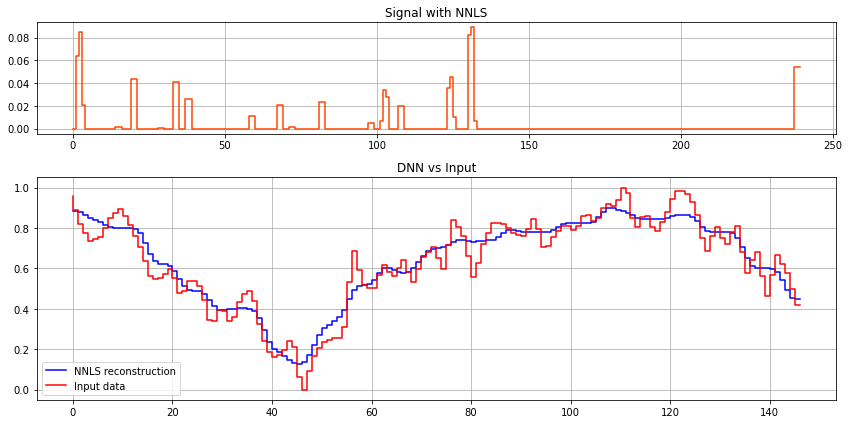

In [22]:
data = data.reshape((147))
coefs = optimize.nnls(np.dot(kernel, base), data)[0][::-1]
print(coefs.shape)
sig = np.dot(base, coefs)
print(sig.shape)
print(sig.min(), sig.max())
sig /= sig.sum()
print(sig.min(), sig.max())
test_dnn = np.dot(kernel, sig[::-1])
results_plot(sig, data, test_dnn)

In [2]:
data = np.load('data/data-128.npy')
kernel = np.load('kernel/kernel-128.npy')


2022-12-19 18:11:43.732439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-19 18:11:43.732573: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 0000: Loss: 7.92005
Epoch 0200: Loss: 0.00363
Epoch 0400: Loss: 0.00306
Epoch 0600: Loss: 0.00158
Epoch 0800: Loss: 0.00142
Epoch 1000: Loss: 0.00189
Epoch 1200: Loss: 0.00171
Epoch 1400: Loss: 0.00073
Epoch 1600: Loss: 0.00147
Epoch 1800: Loss: 0.00062
Epoch 2000: Loss: 0.00060


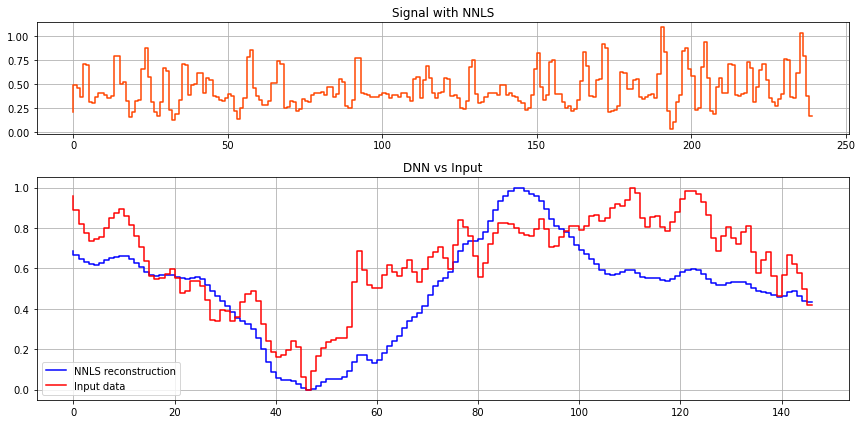

In [4]:
data = nor_data(data)
sig_dnn = ca_fit(data, np.dot(kernel,base), num_epochs = 2001)
# sig_dnn_tmp /= sig_dnn.sum()
sig_dnn_tmp = np.dot(base, sig_dnn)

test_dnn = nor_data(np.dot(kernel, sig_dnn_tmp))
# test_dnn = np.dot(kernel, sig_dnn_tmp)
test_dnn.shape

results_plot(sig_dnn_tmp, data, test_dnn)

In [5]:
test_dnn = np.dot(kernel, sig_dnn_tmp/10)
test_dnn.shape

results_plot(sig_dnn_tmp, data, test_dnn)

NameError: name 'sig_dnn_tmp' is not defined

0.0 0.05327161
0.6821626323190316 0.6096352466823741


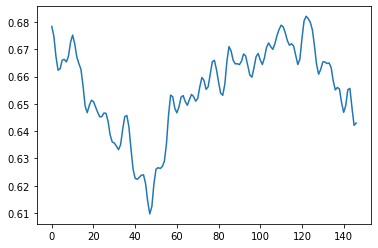

In [16]:
sig_tmp = sig_dnn/sig_dnn.sum()
print(sig_tmp.min(), sig_tmp.max())
sig_tmp = np.dot(base, sig_tmp)

# test_dnn = nor_data(np.dot(kernel, sig_dnn_tmp))
test_tmp = np.dot(kernel, sig_tmp)
# test_tmp = test_tmp/test_tmp.max()
print(test_tmp.max(), test_tmp.min())

plt.plot(test_tmp)
# plt.subplots(figsize=[12, 2])
# plt.step(np.arange(sig_dnn.size), sig_dnn[::-1], color='orangered')
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# data_tmp = np.reshape(data, (804))
# plt.subplots(figsize=[12, 4])
# plt.step(np.arange(test_dnn.size), test_dnn, color='blue')
# plt.step(np.arange(data_tmp.size), data_tmp, color='red')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [3]:
data = np.zeros((153, 804))
kernel = np.zeros((153, 804, 256))
for i in range(153):
    data[i] = np.load(f'data/data-{i}.npy')
    
    
    kernel[i] = np.load(f'kernel/kernel-{i}.npy')



ValueError: could not broadcast input array from shape (798,) into shape (804,)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-14 13:53:41.412076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-14 13:53:41.412233: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Reconstruction of data 0 has been done.
Reconstruction of data 1 has been done.
Reconstruction of data 2 has been done.
Reconstruction of data 3 has been done.
Reconstruction of data 4 has been done.
Reconstruction of data 5 has been done.
Reconstruction of data 6 has been done.
Reconstruction of data 7 has been done.
Reconstruction of data 8 has been done.
Reconstruction of data 9 has been done.
Reconstruction of data 10 has been done.
Reconstruction of data 11 has been done.
Reconstruction of data 12 has been done.
Reconstruction of data 13 has been done.
Reconstruction of data 14 has been done.
Reconstruction of data 15 has been done.
Reconstruction of data 16 has been done.
Reconstruction of data 17 has been done.
Reconstruction of data 18 has been done.
Reconstruction of data 19 has been done.


/var/folders/5s/k16zskrj0mxg46fkr77fdmgc0000gq/T/ipykernel_49251/3678781327.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12,6), gridspec_kw={'height_ratios': [1, 2]})


Reconstruction of data 20 has been done.
Reconstruction of data 21 has been done.
Reconstruction of data 22 has been done.
Reconstruction of data 23 has been done.
Reconstruction of data 24 has been done.
Reconstruction of data 25 has been done.
Reconstruction of data 26 has been done.
Reconstruction of data 27 has been done.
Reconstruction of data 28 has been done.
Reconstruction of data 29 has been done.
Reconstruction of data 30 has been done.
Reconstruction of data 31 has been done.
Reconstruction of data 32 has been done.
Reconstruction of data 33 has been done.
Reconstruction of data 34 has been done.
Reconstruction of data 35 has been done.
Reconstruction of data 36 has been done.
Reconstruction of data 37 has been done.
Reconstruction of data 38 has been done.
Reconstruction of data 39 has been done.
Reconstruction of data 40 has been done.
Reconstruction of data 41 has been done.
Reconstruction of data 42 has been done.
Reconstruction of data 43 has been done.
Reconstruction o

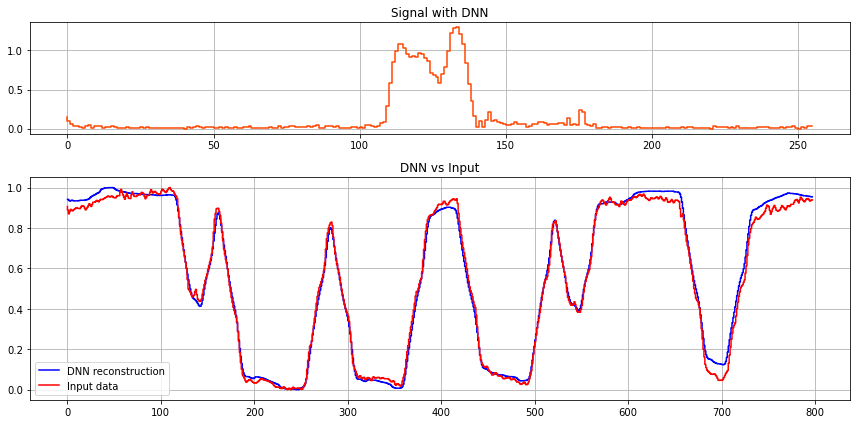

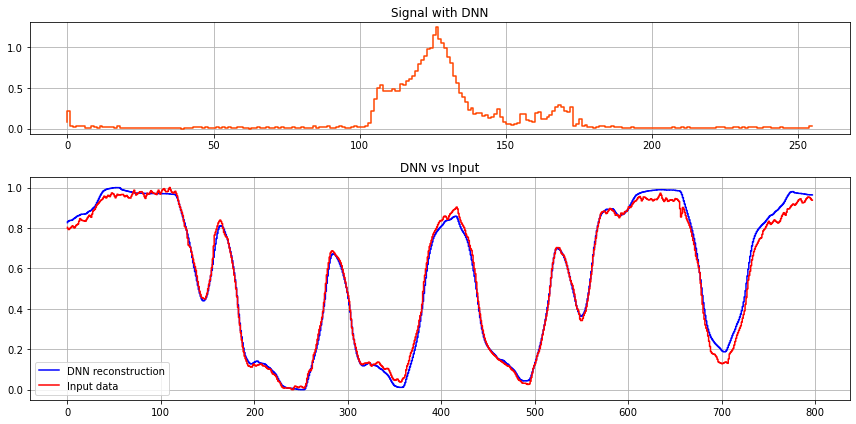

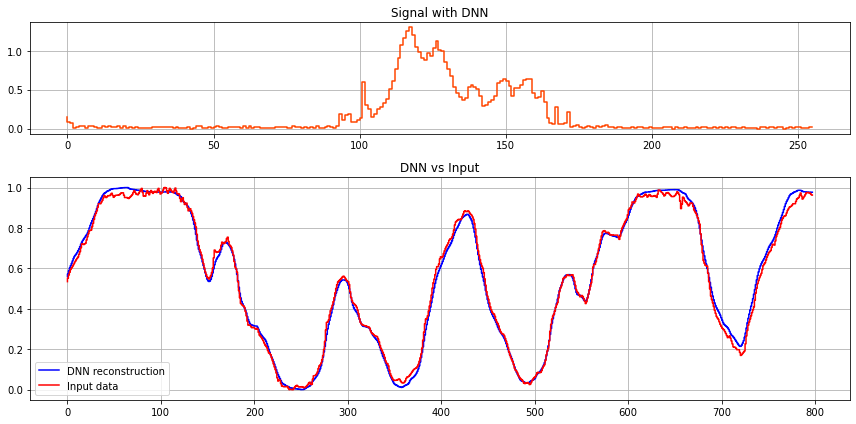

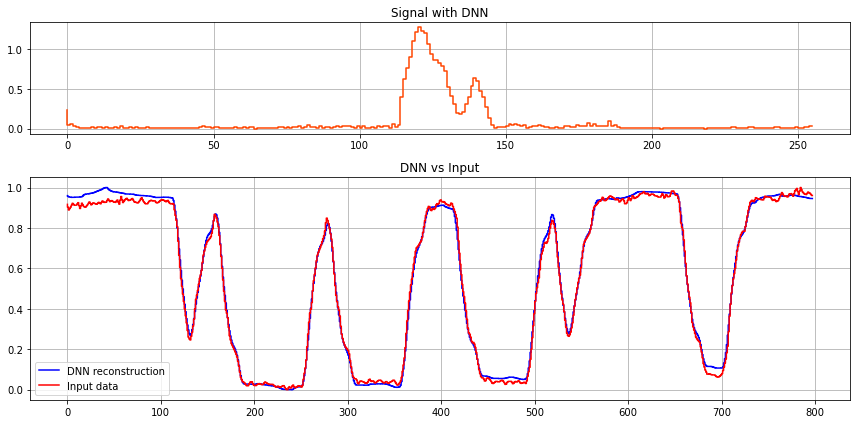

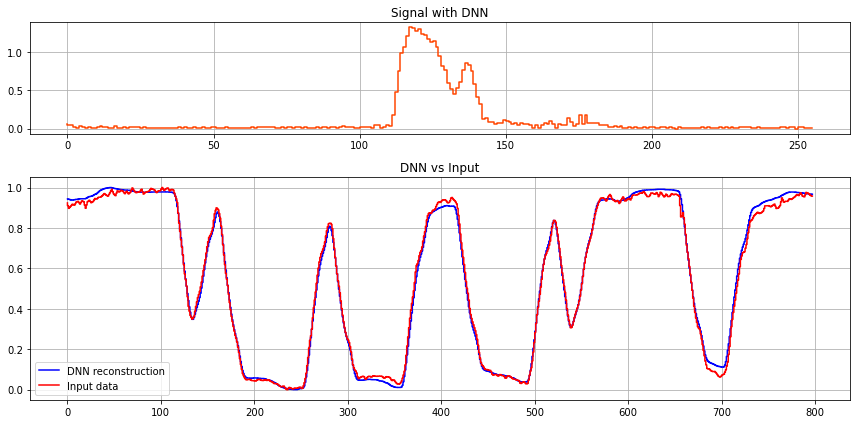

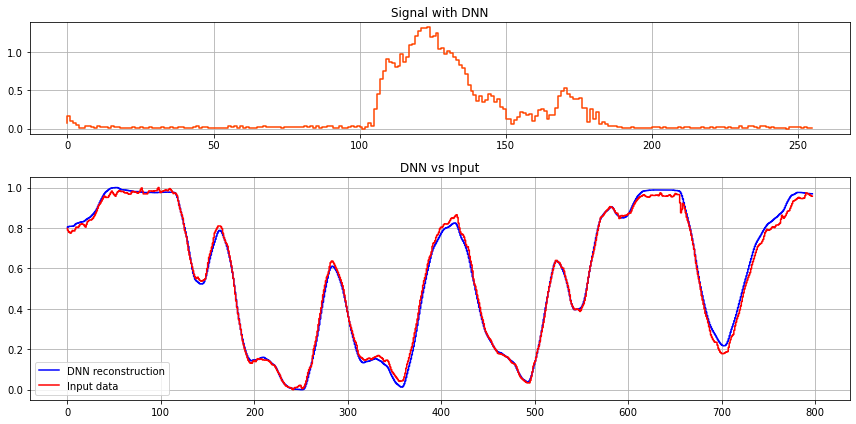

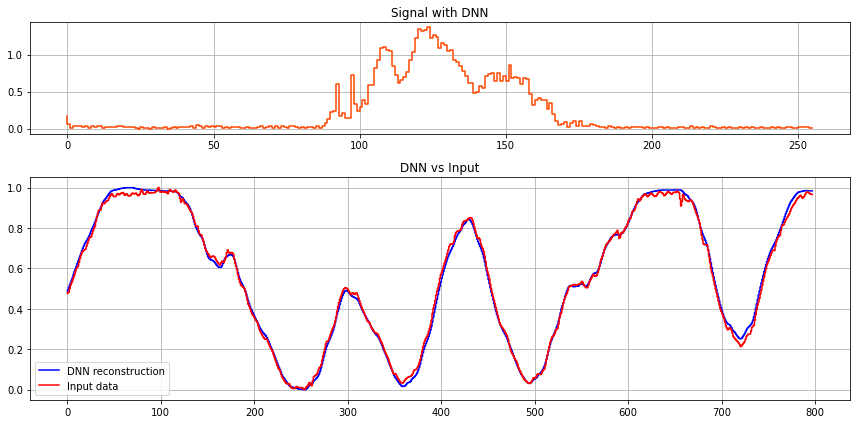

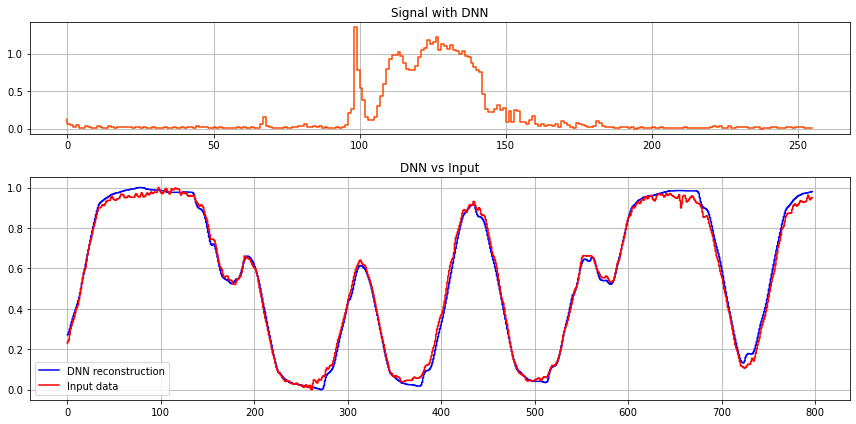

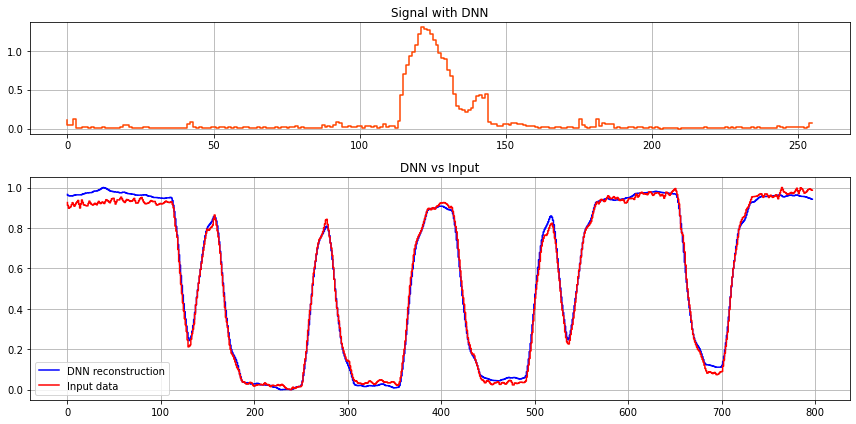

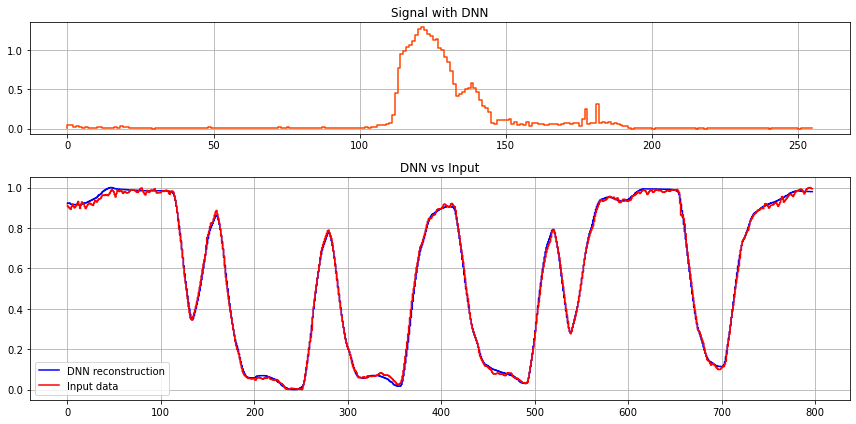

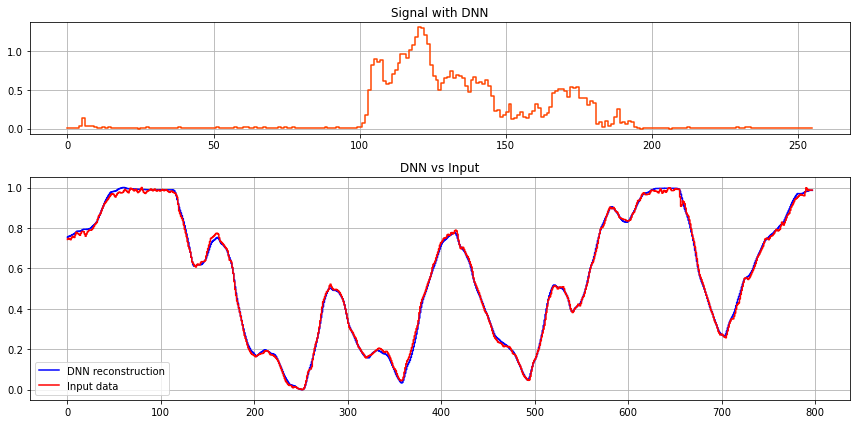

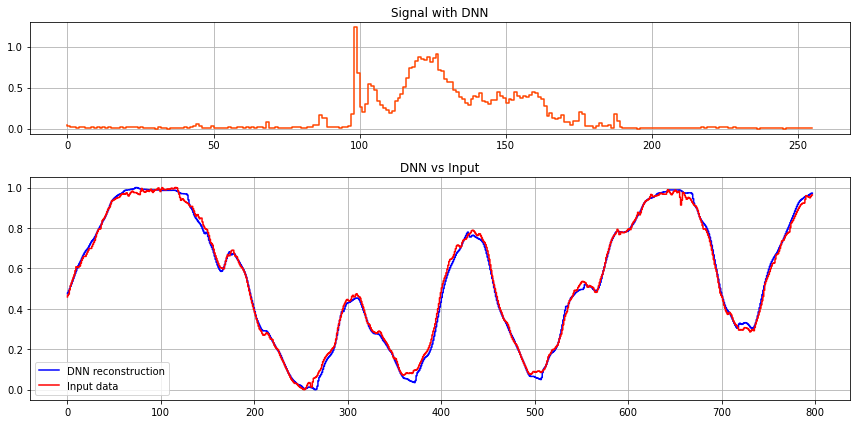

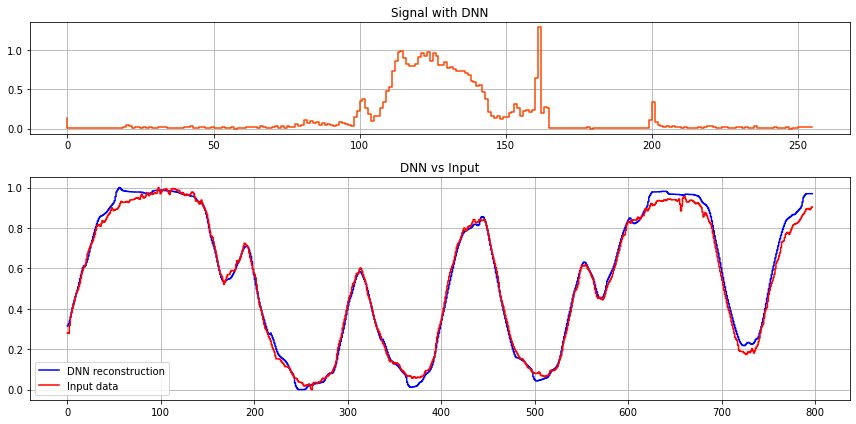

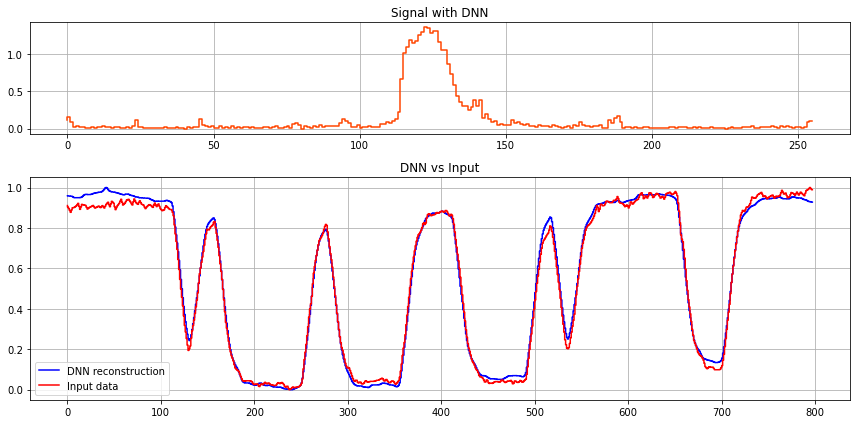

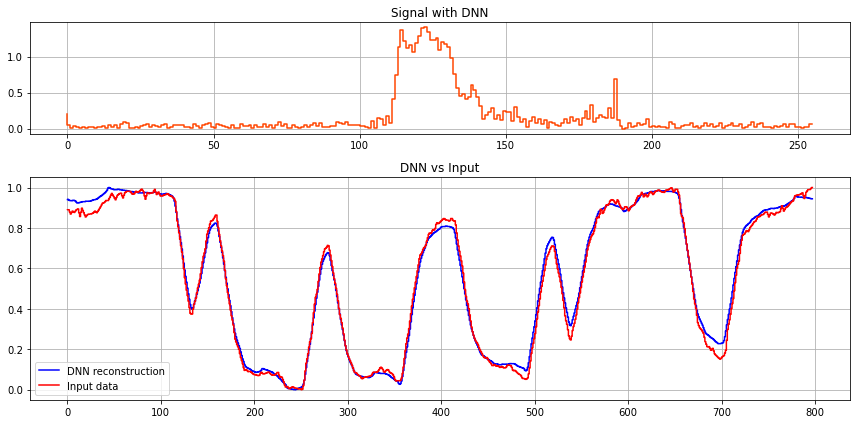

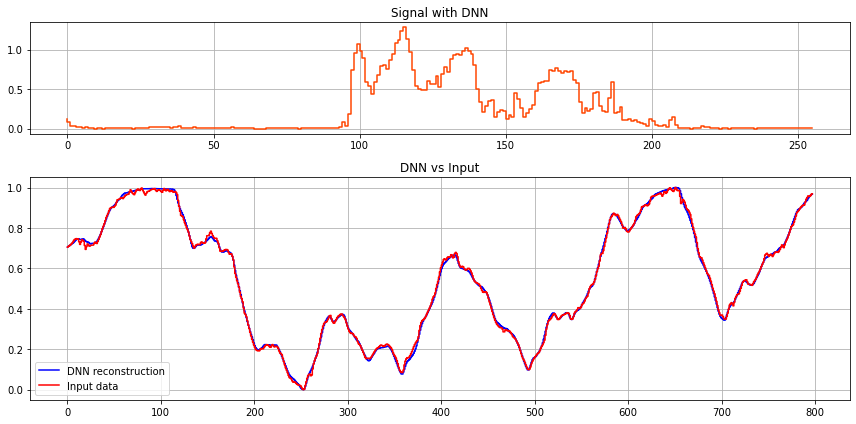

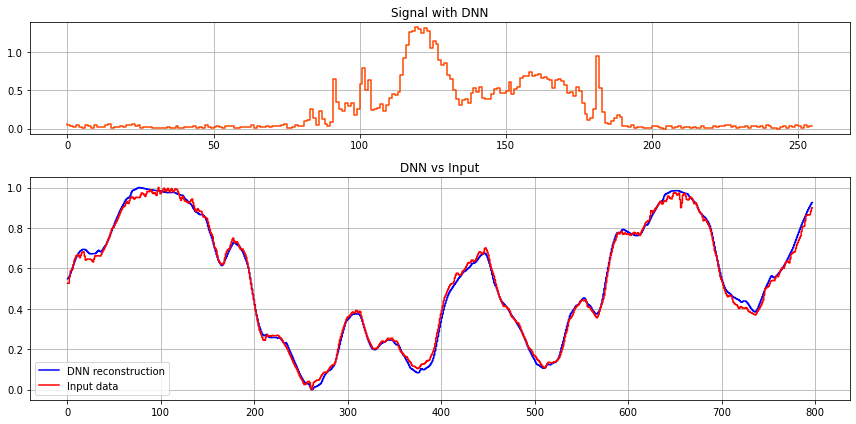

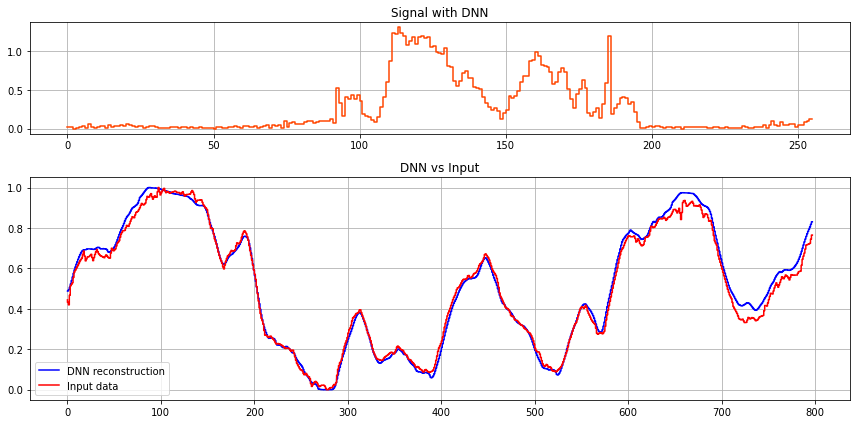

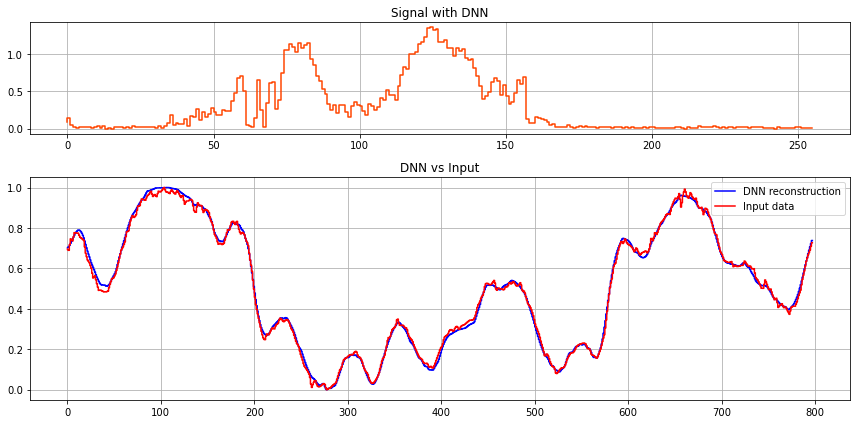

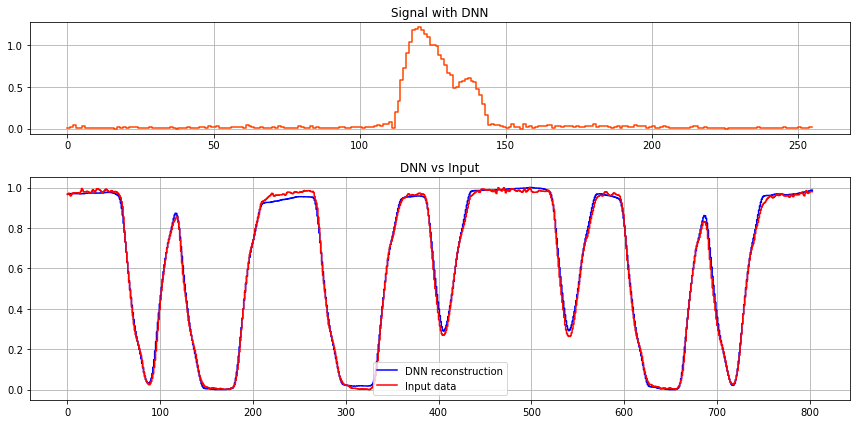

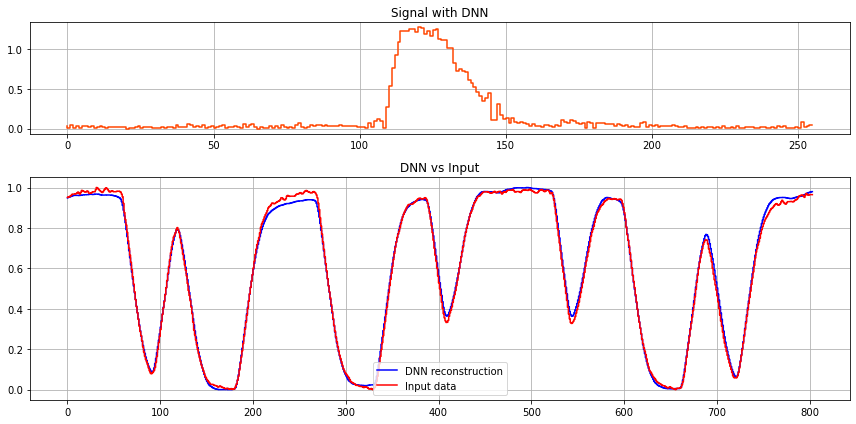

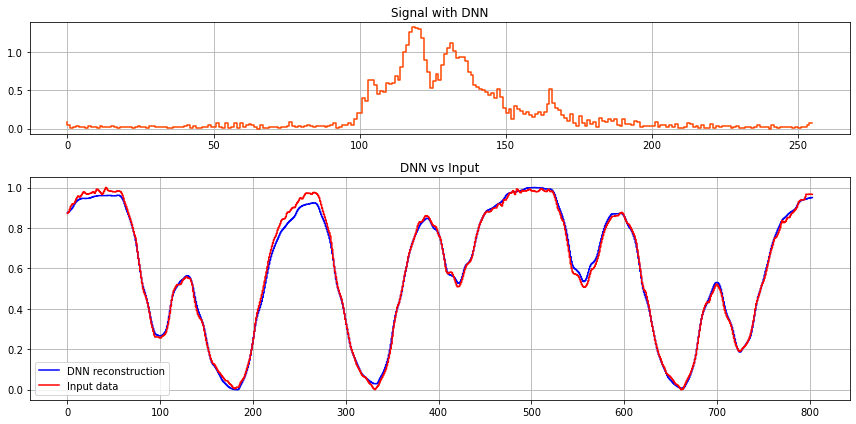

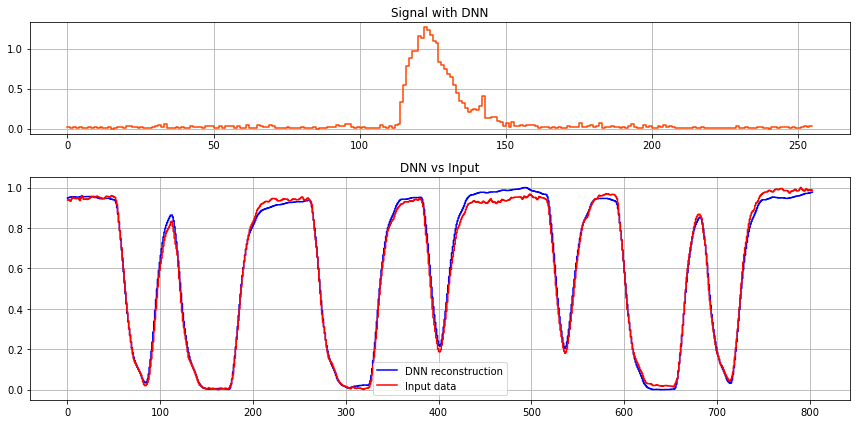

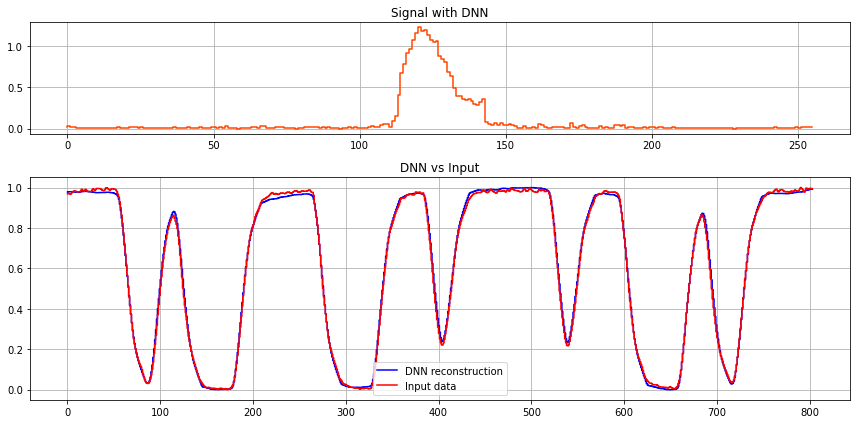

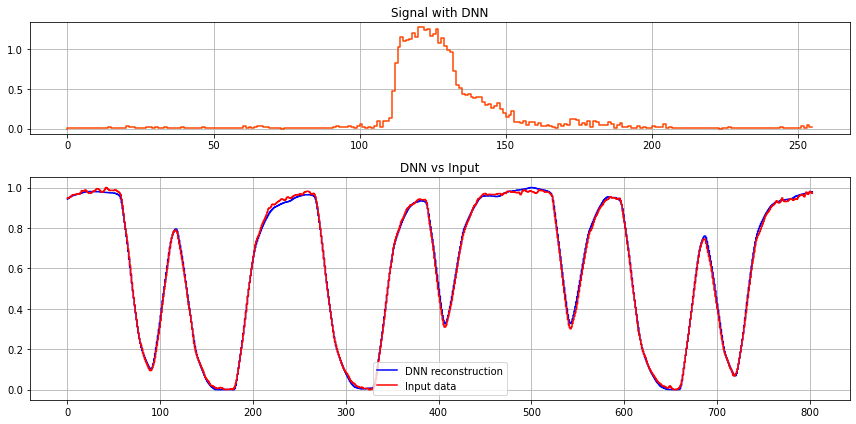

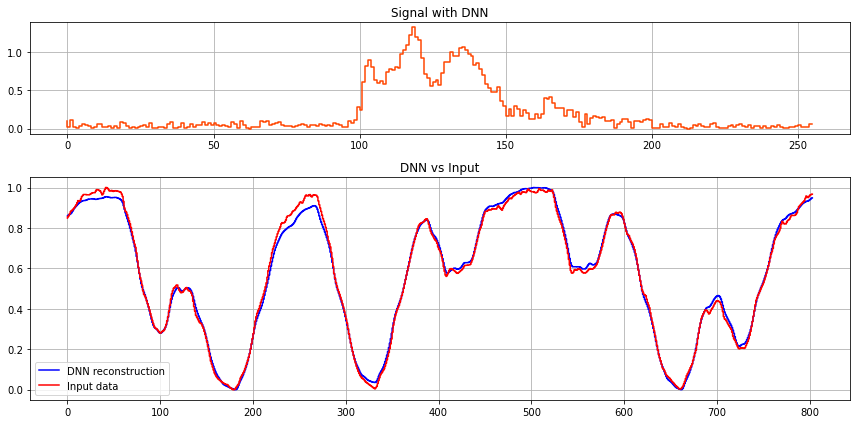

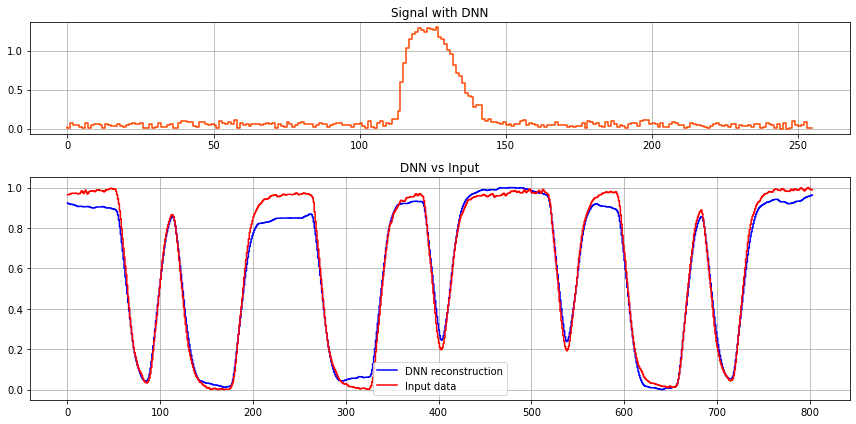

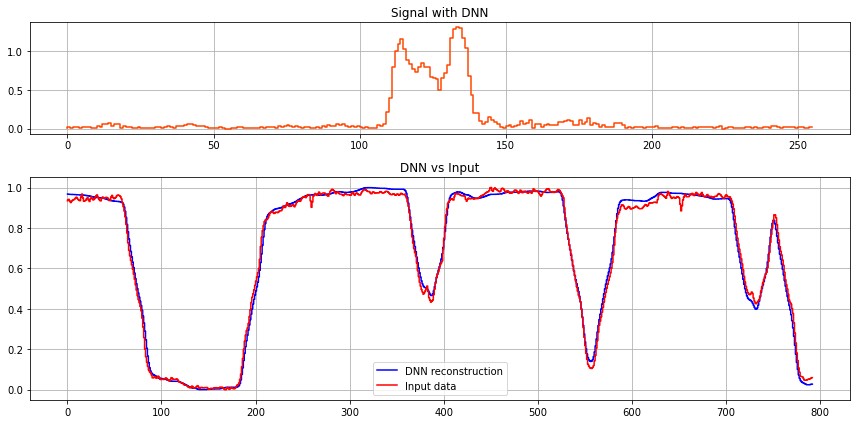

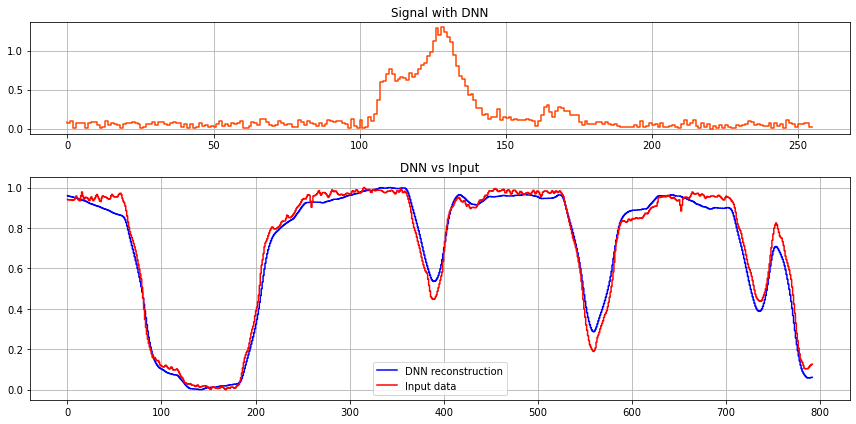

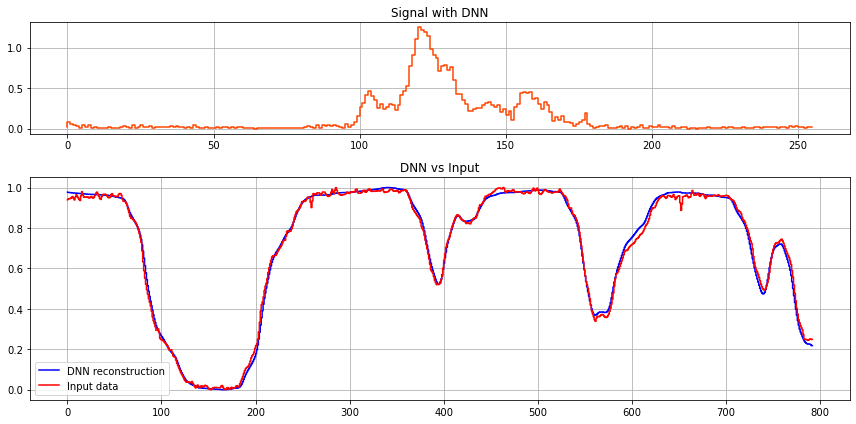

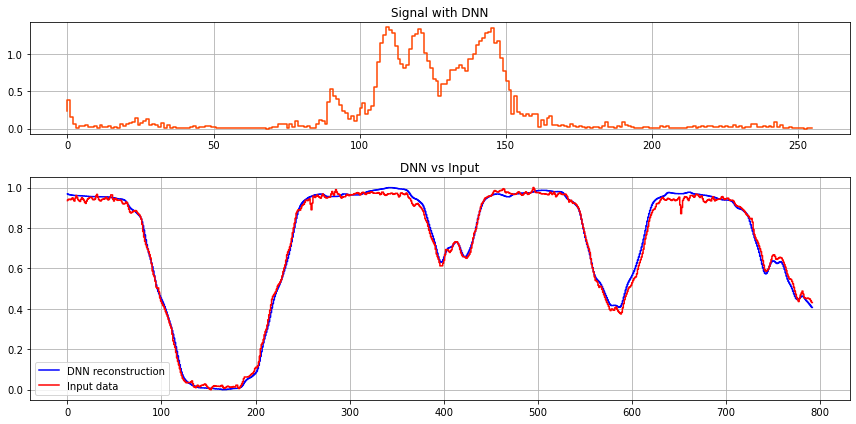

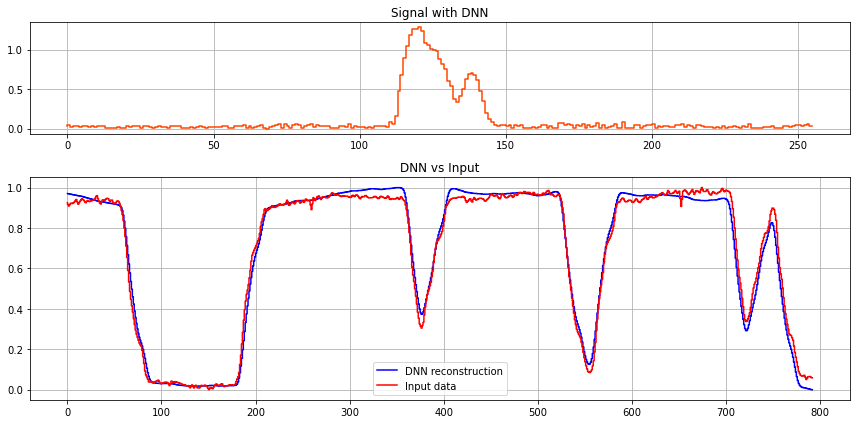

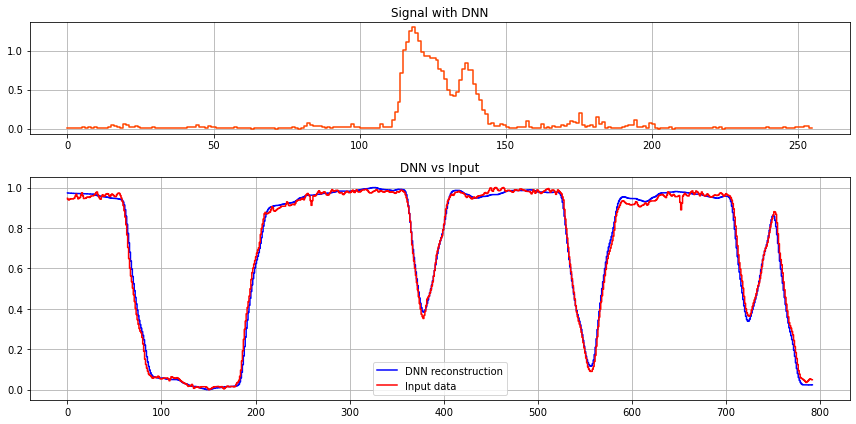

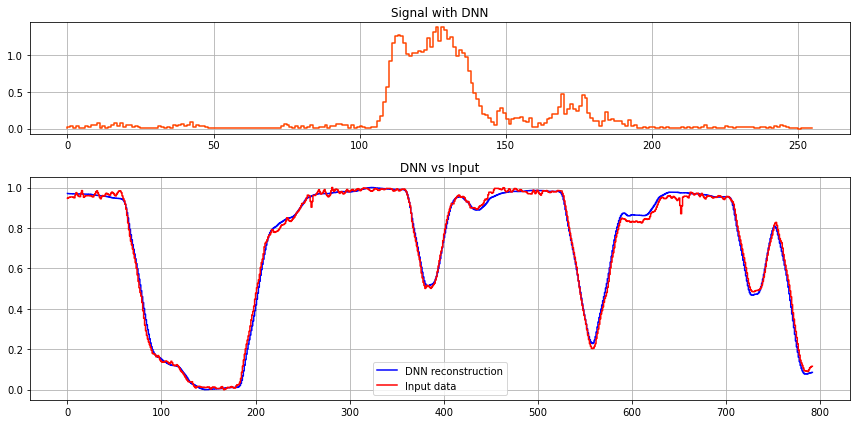

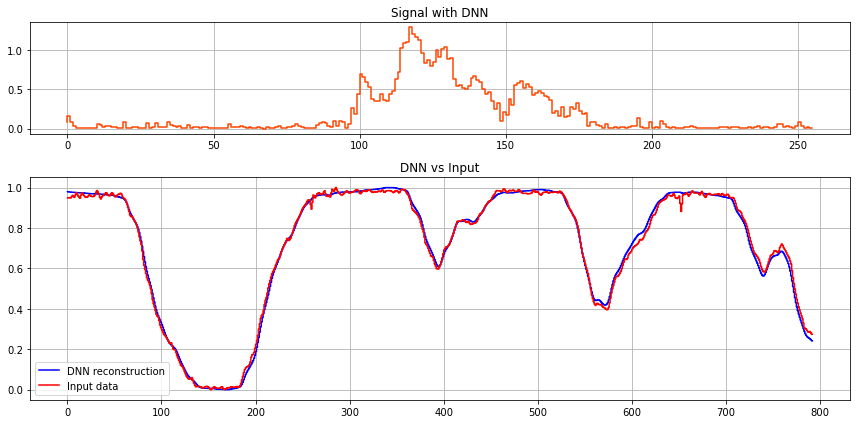

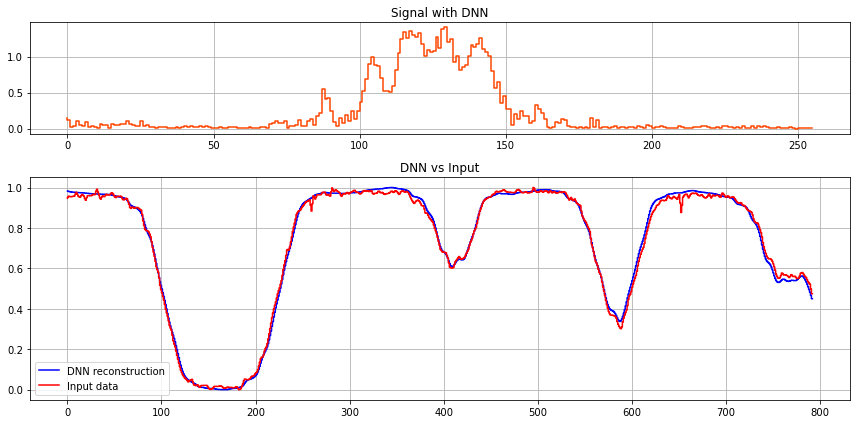

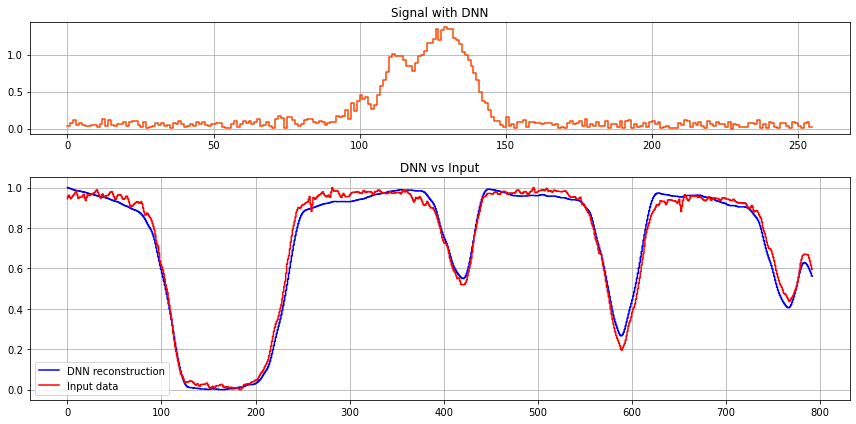

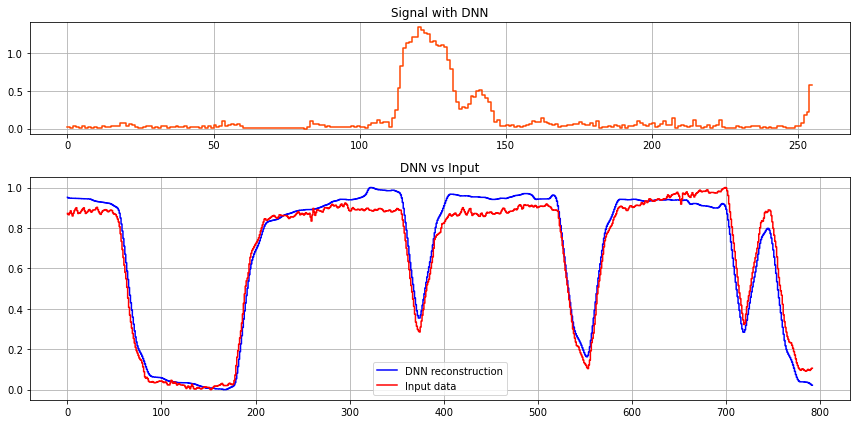

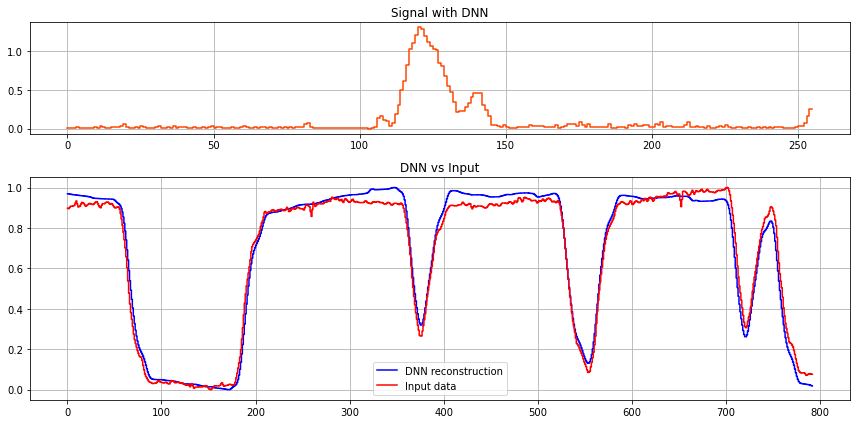

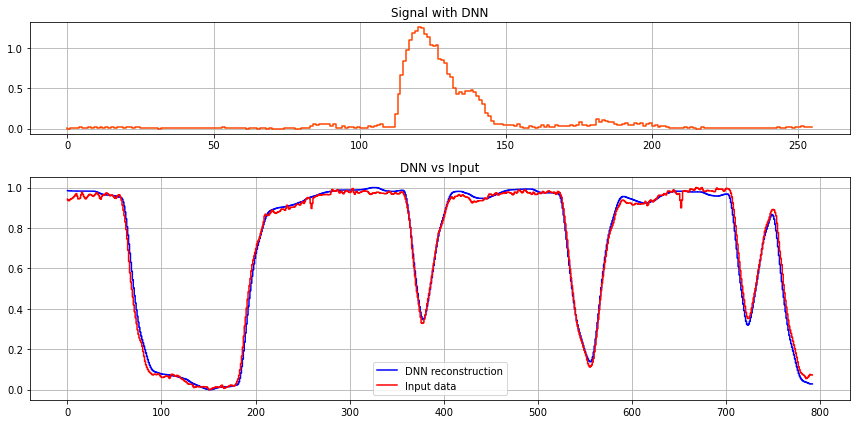

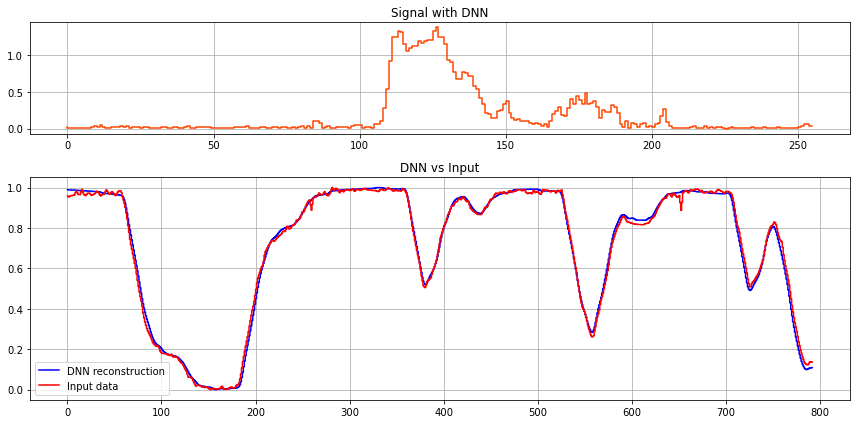

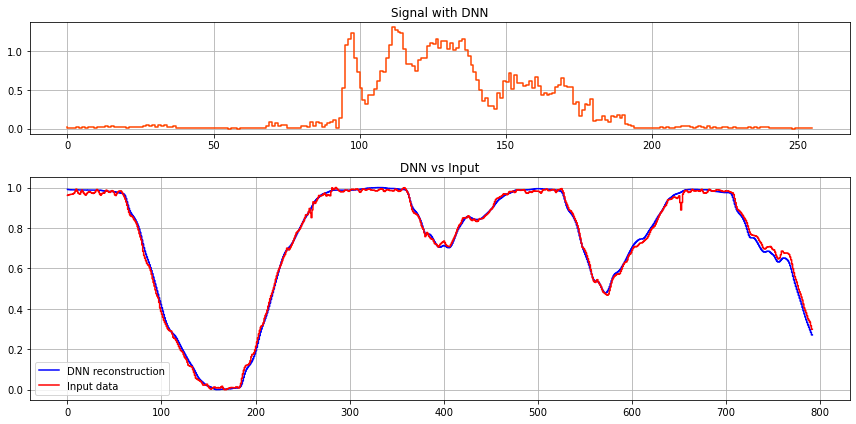

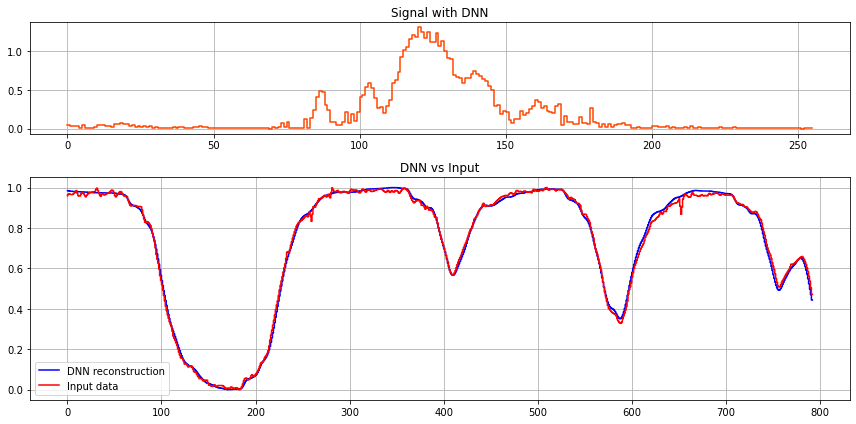

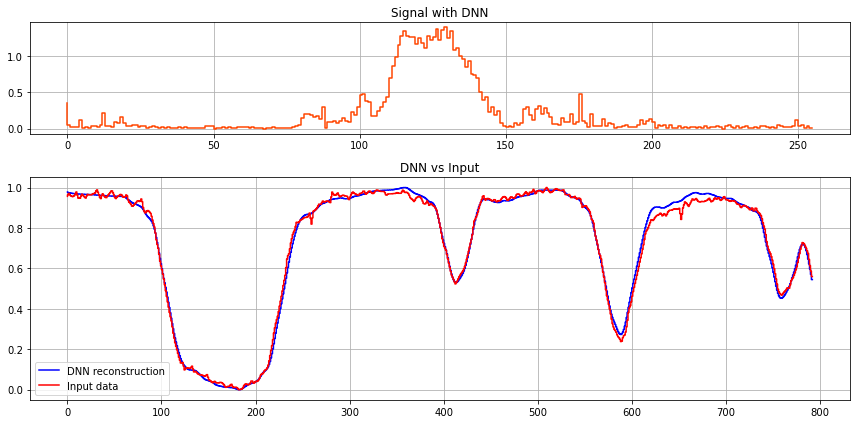

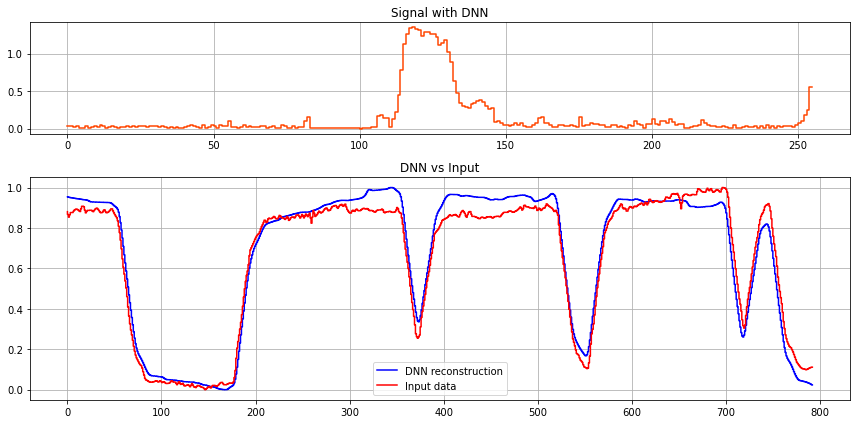

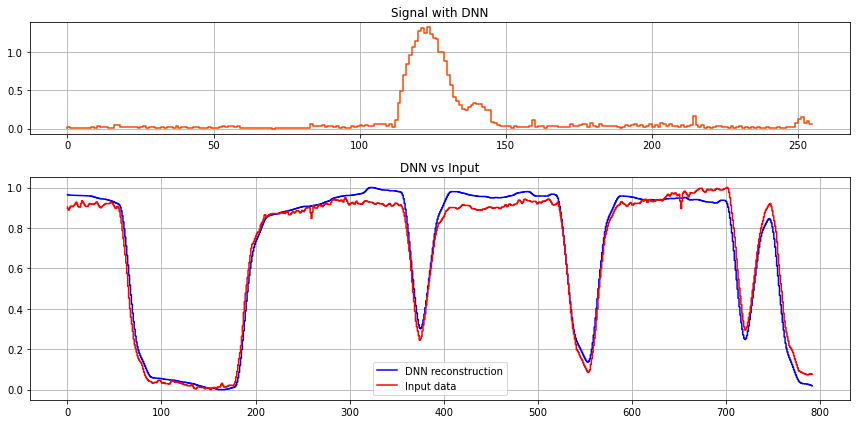

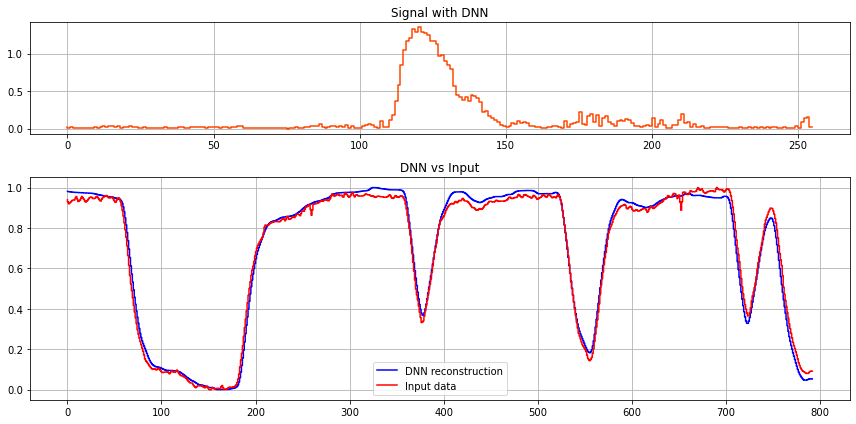

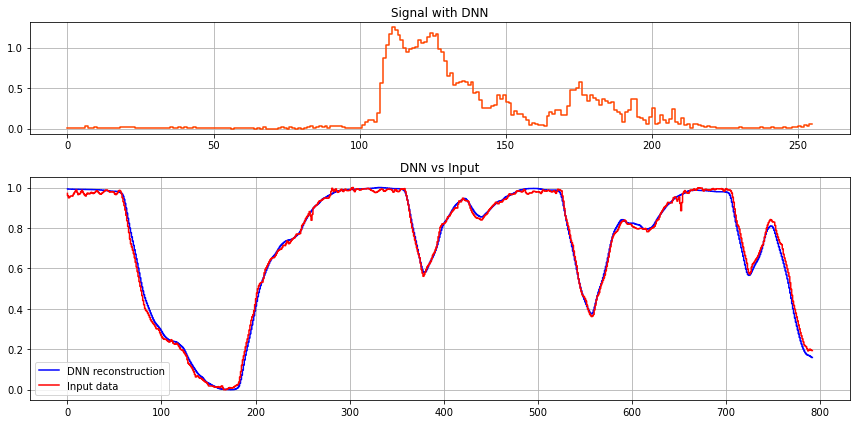

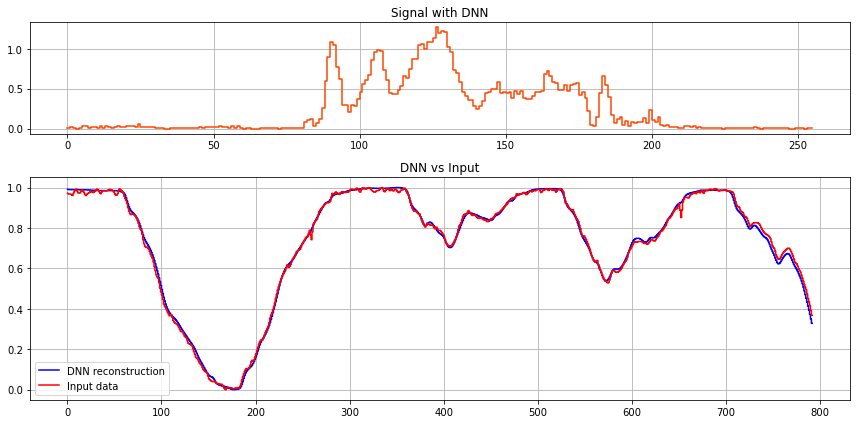

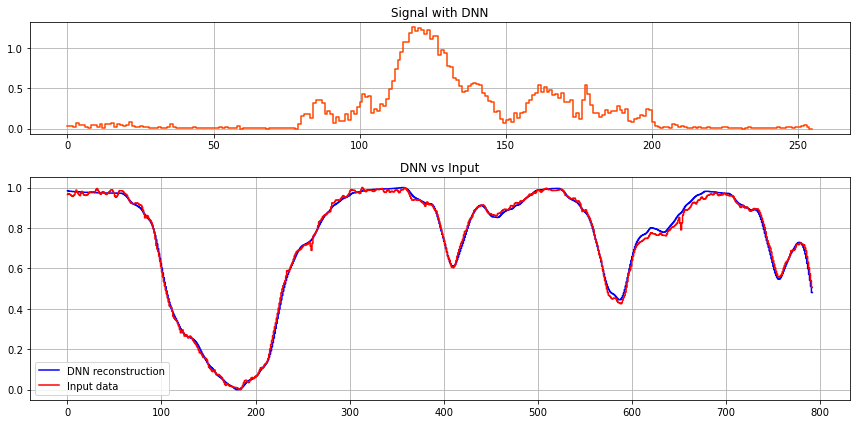

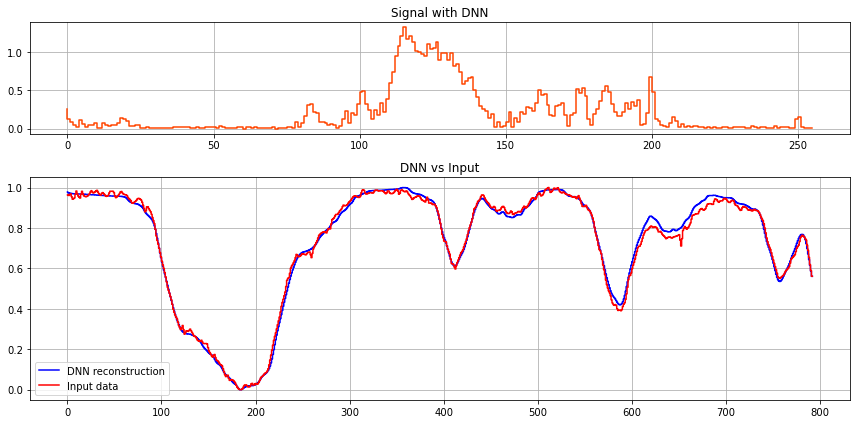

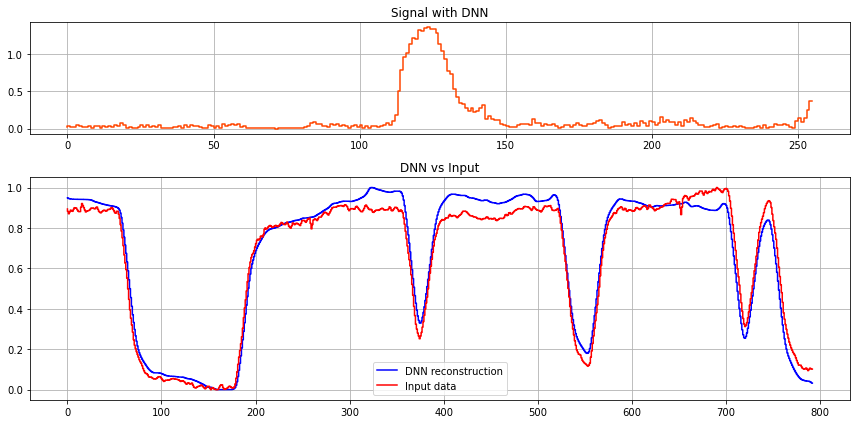

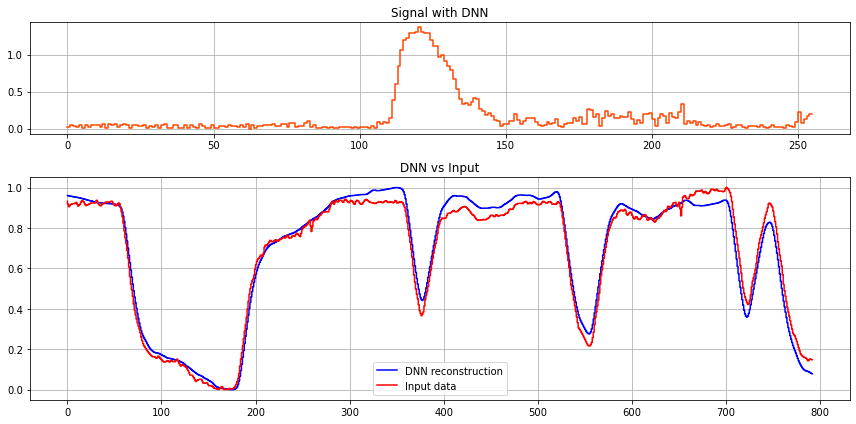

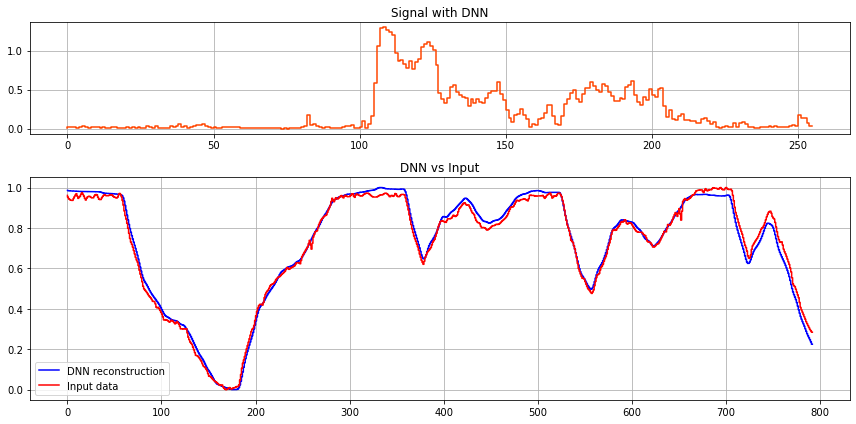

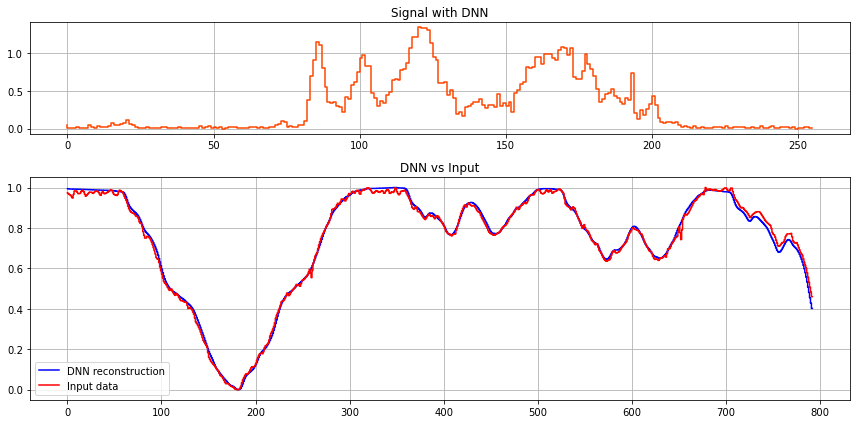

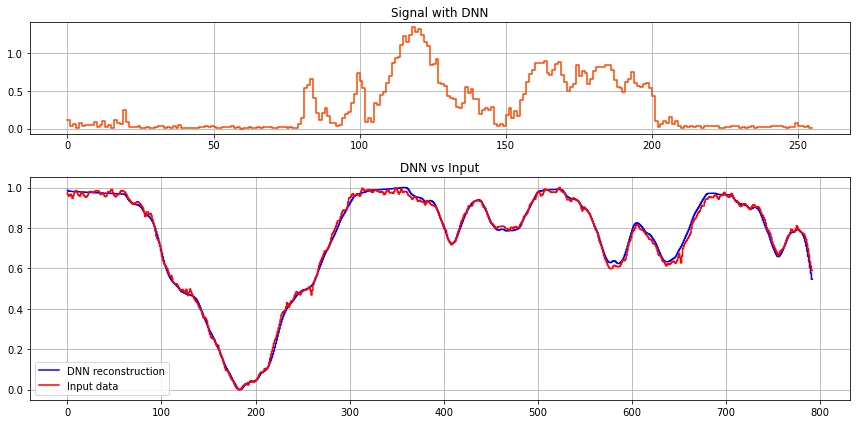

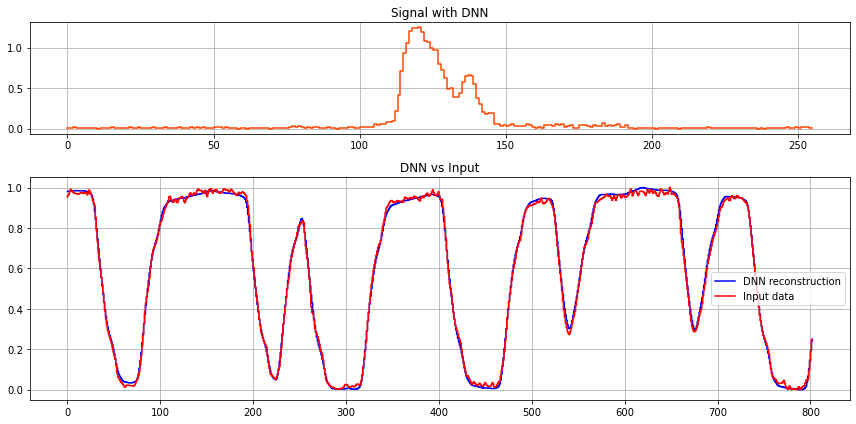

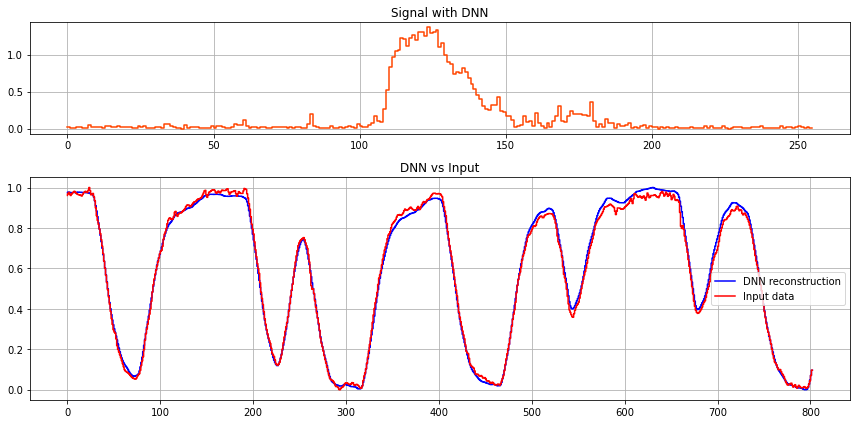

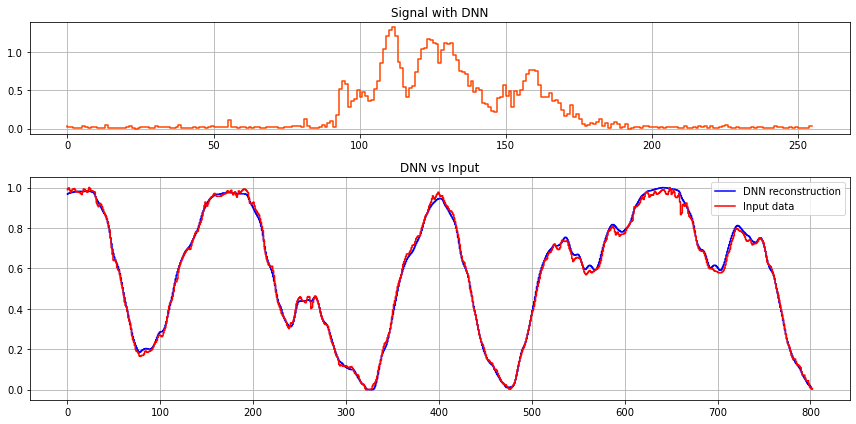

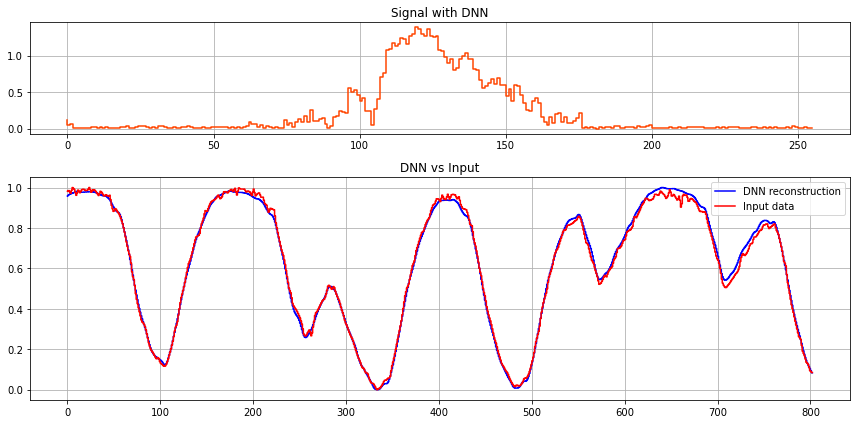

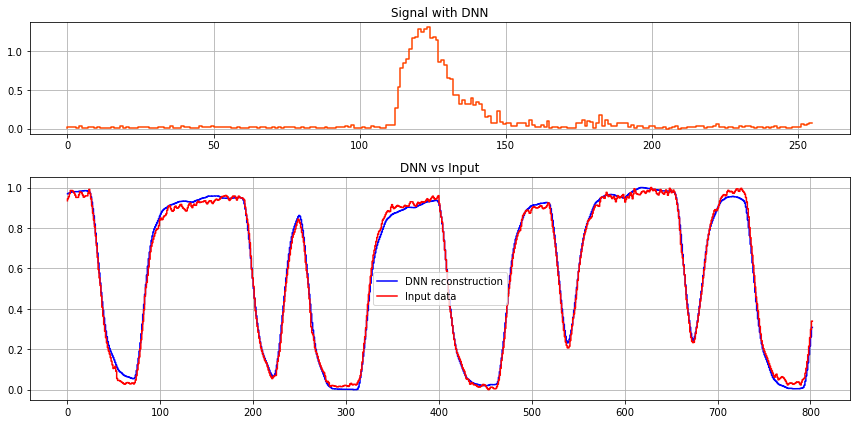

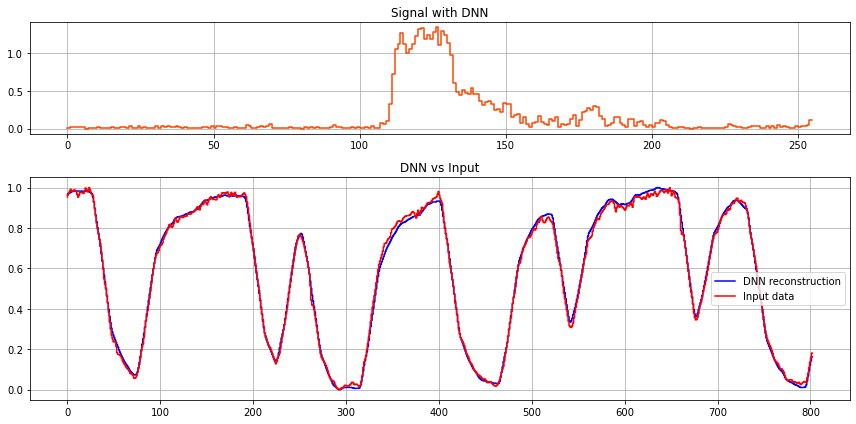

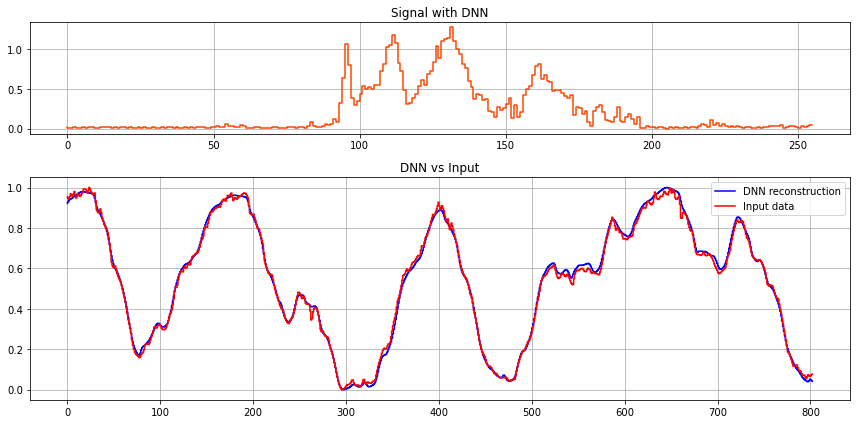

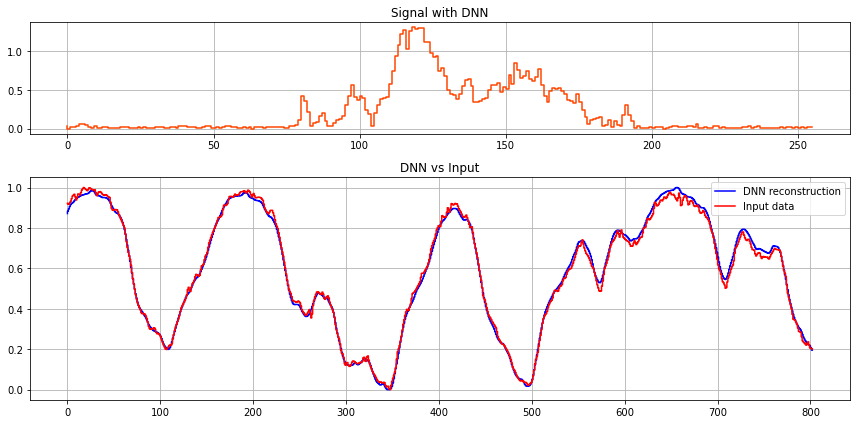

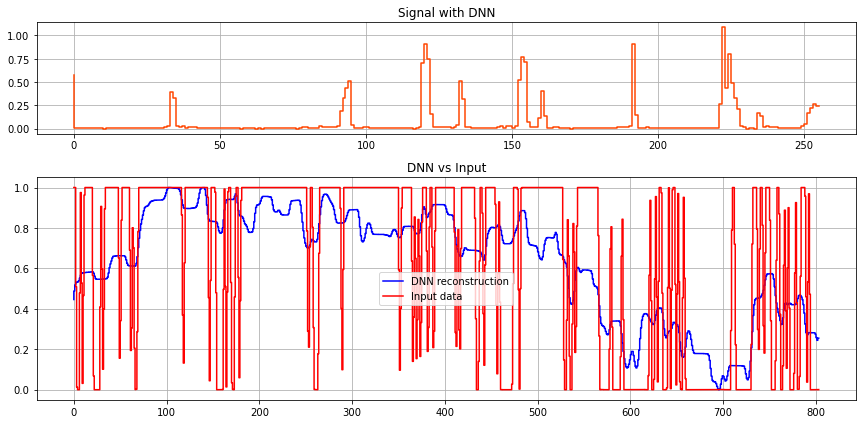

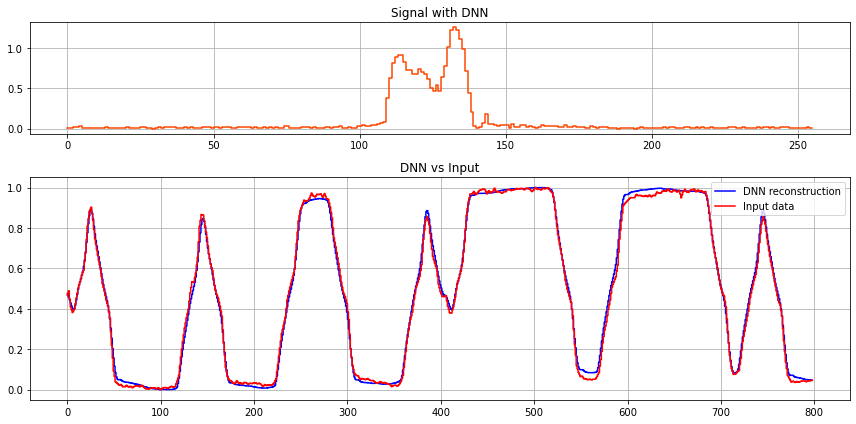

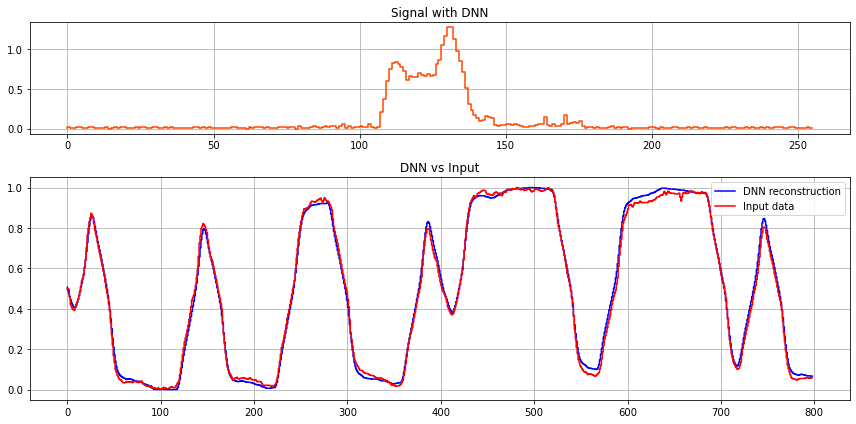

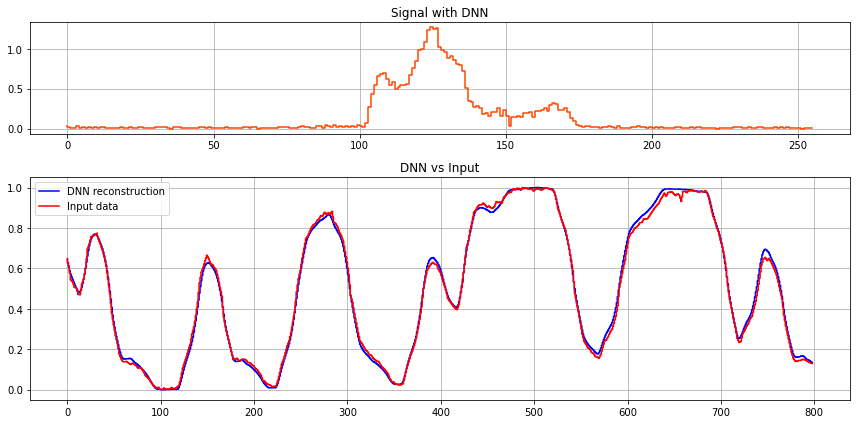

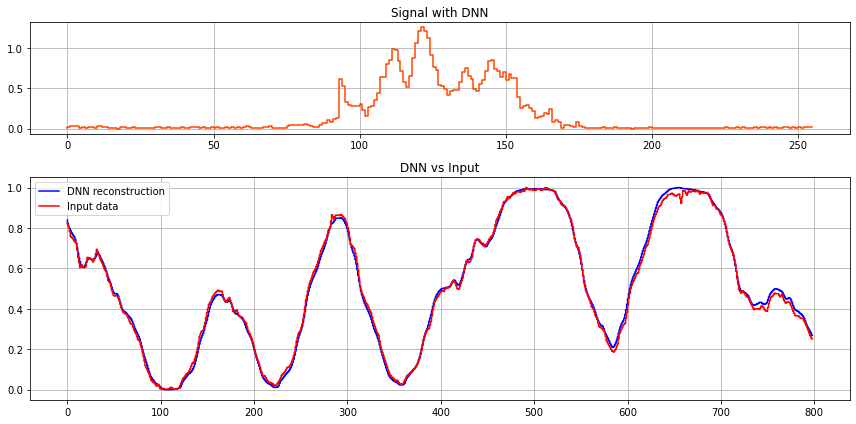

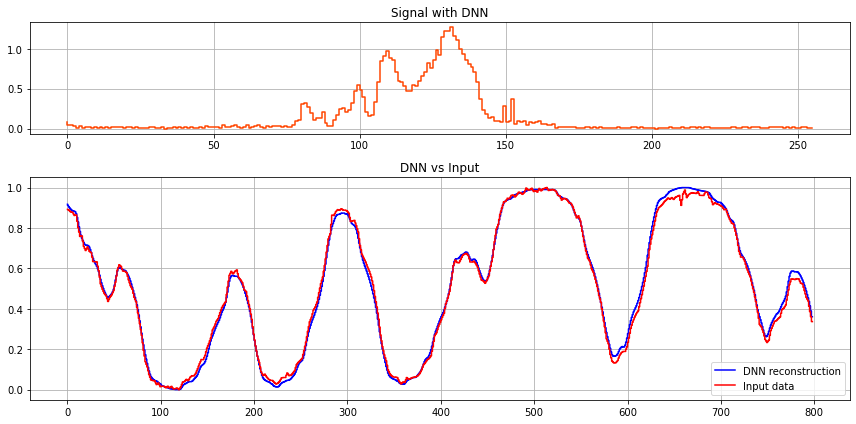

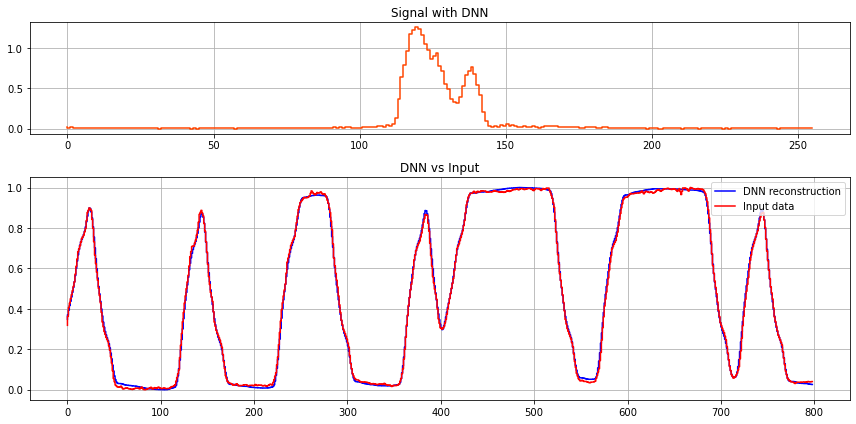

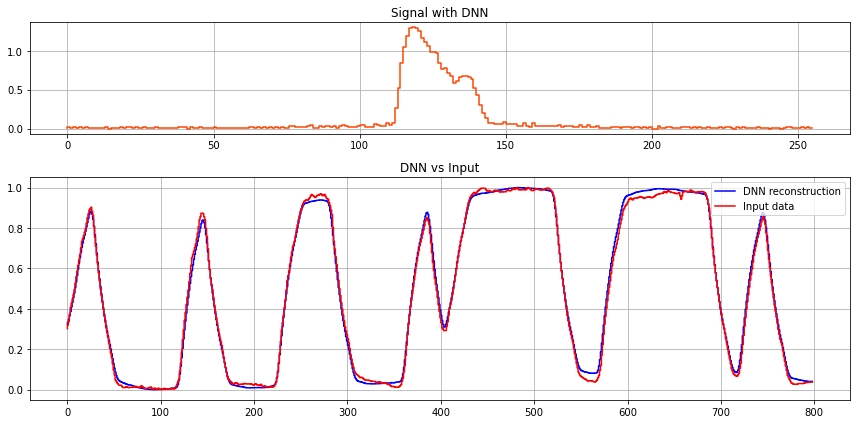

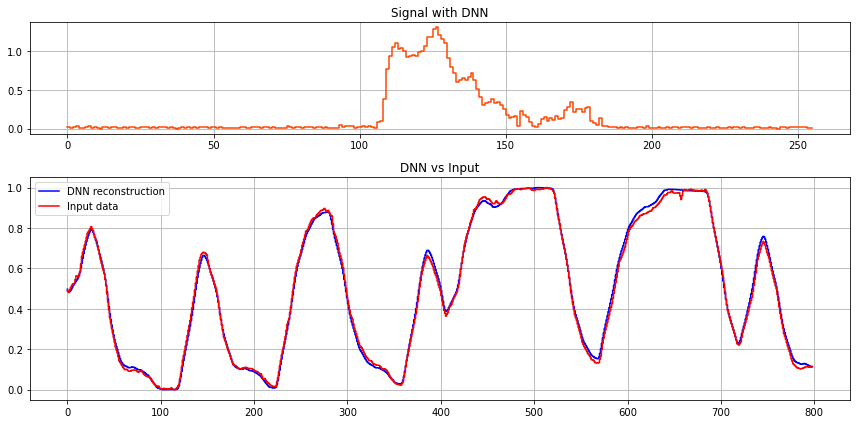

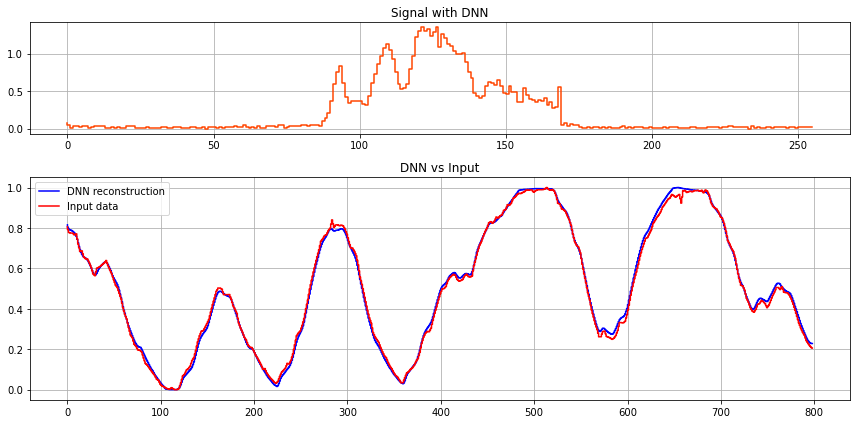

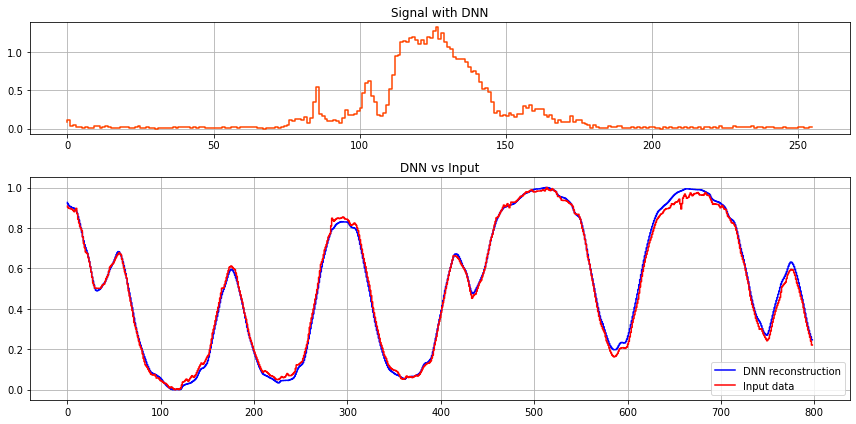

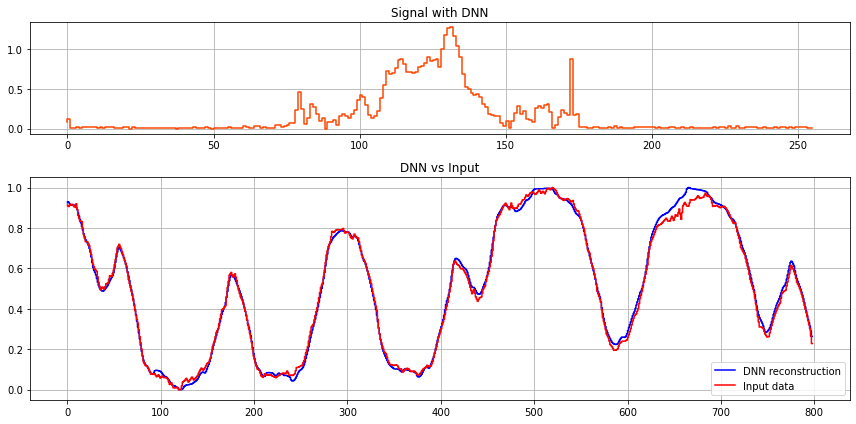

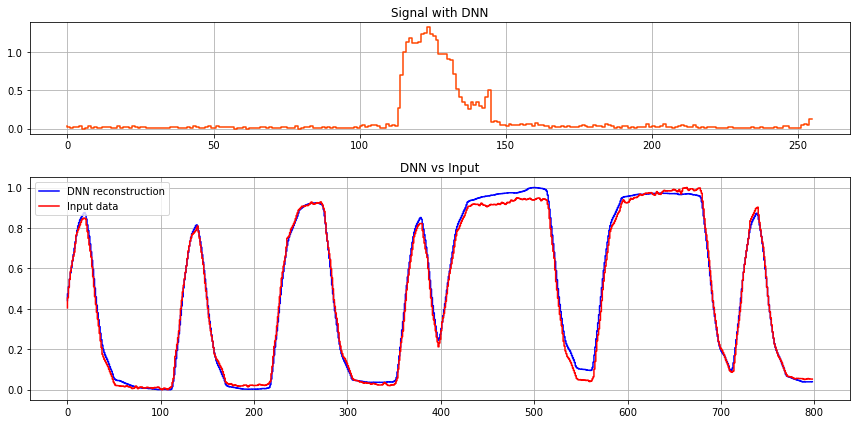

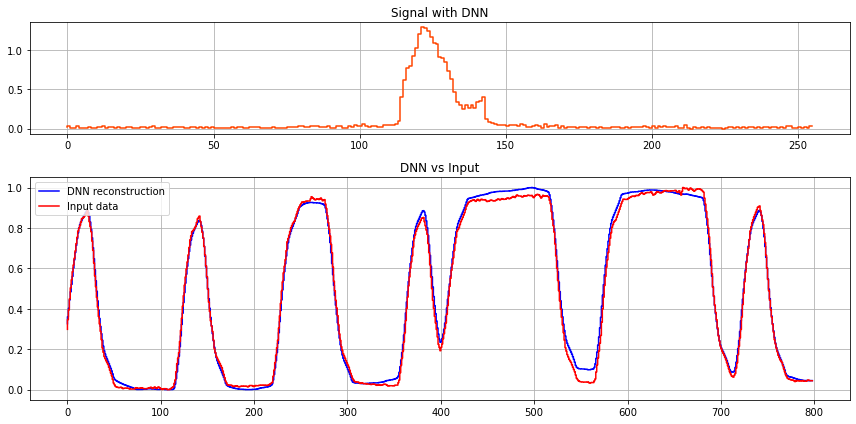

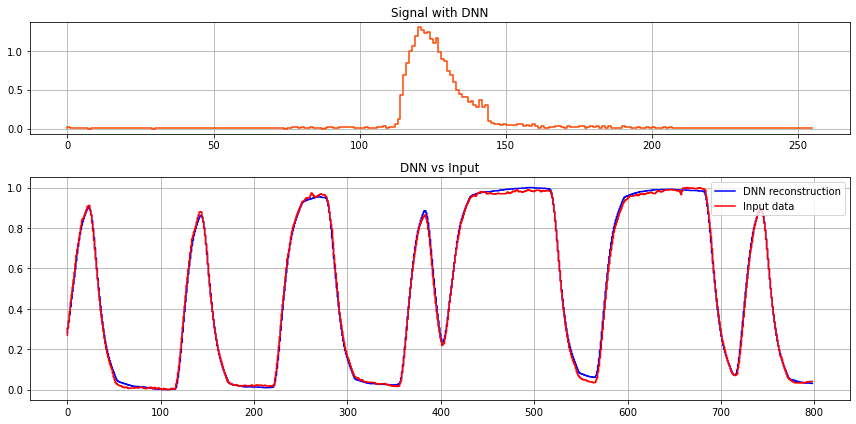

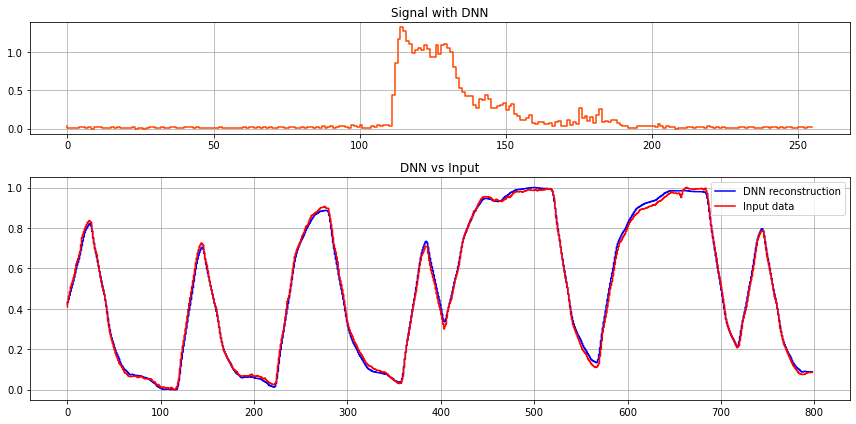

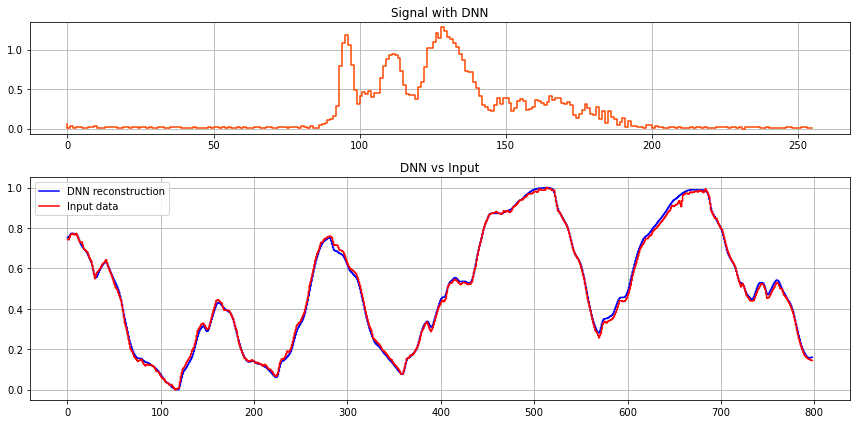

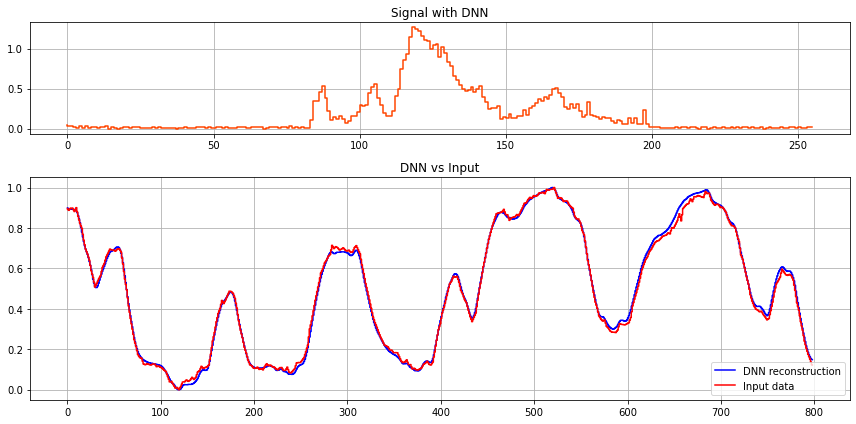

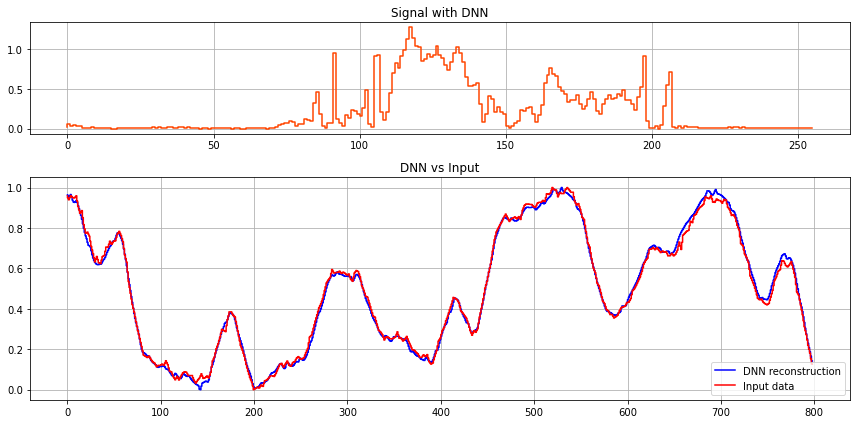

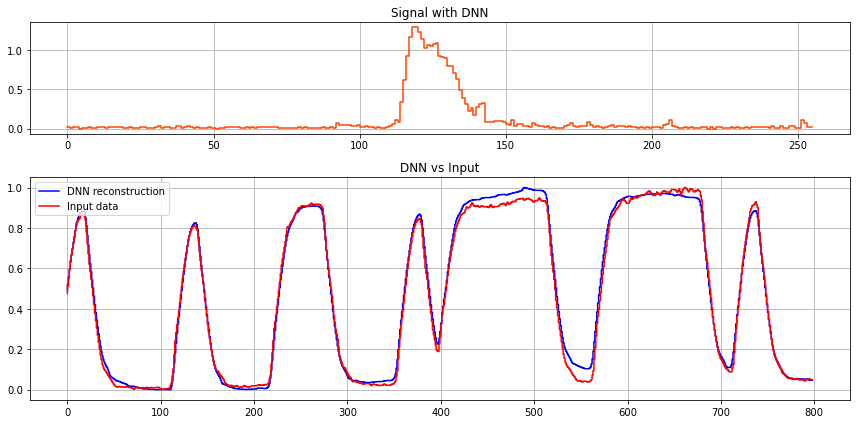

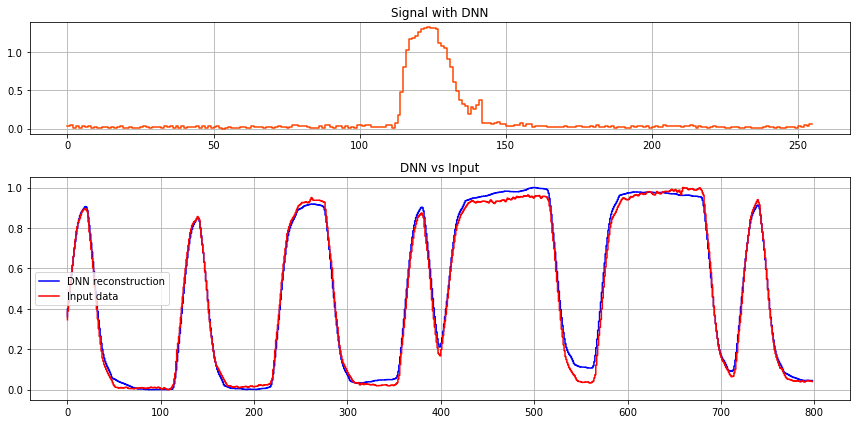

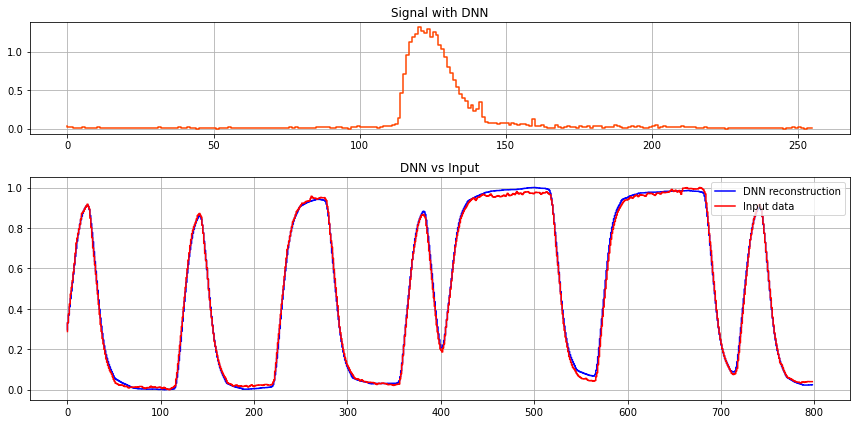

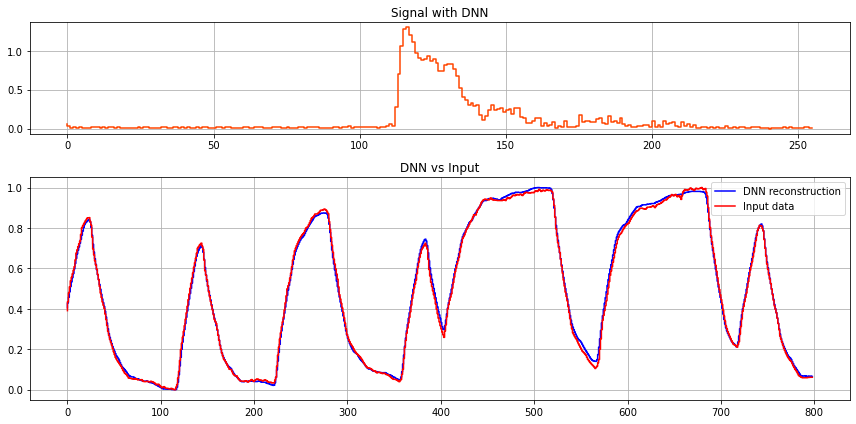

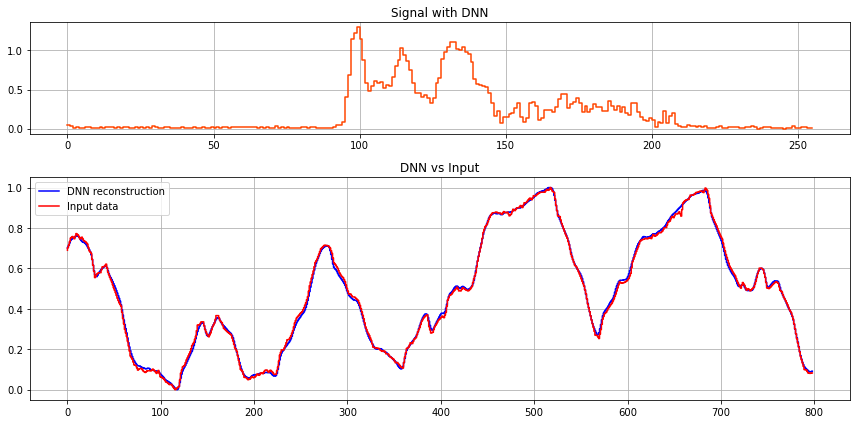

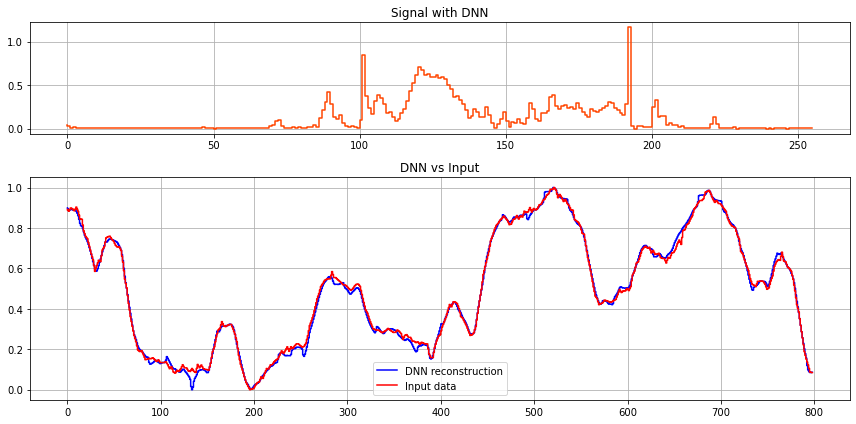

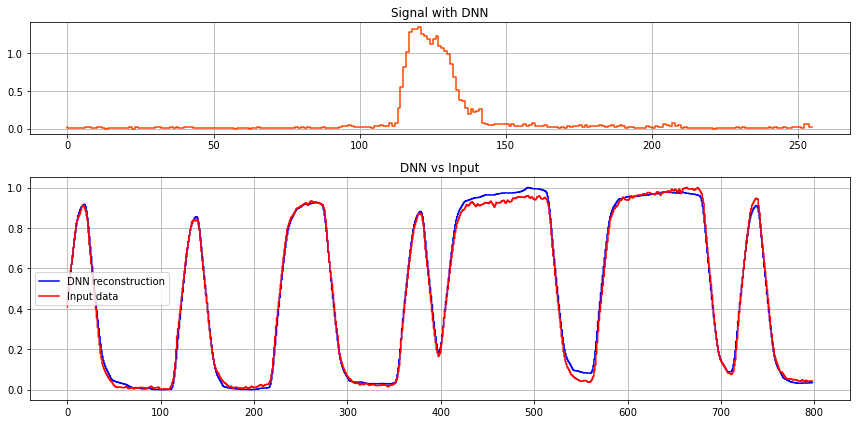

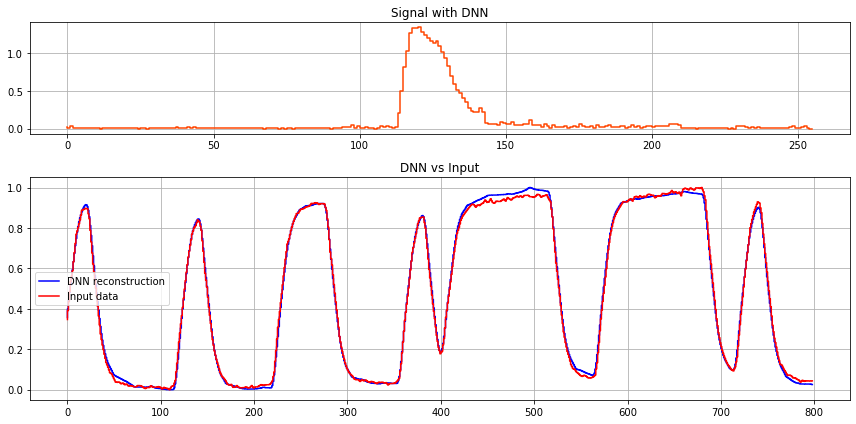

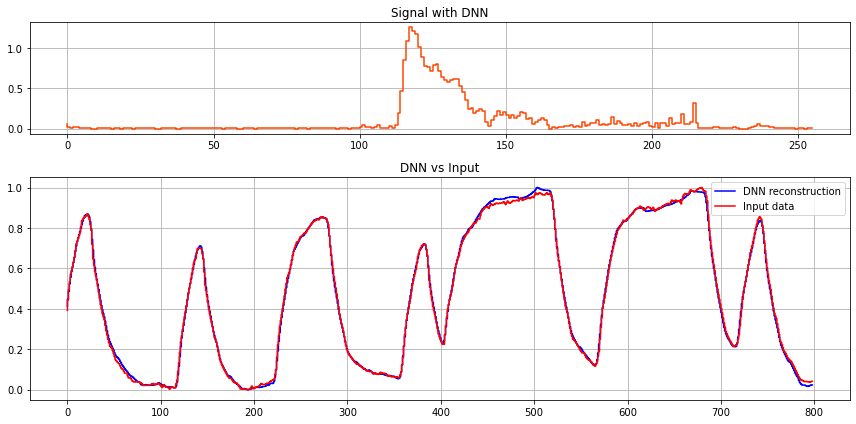

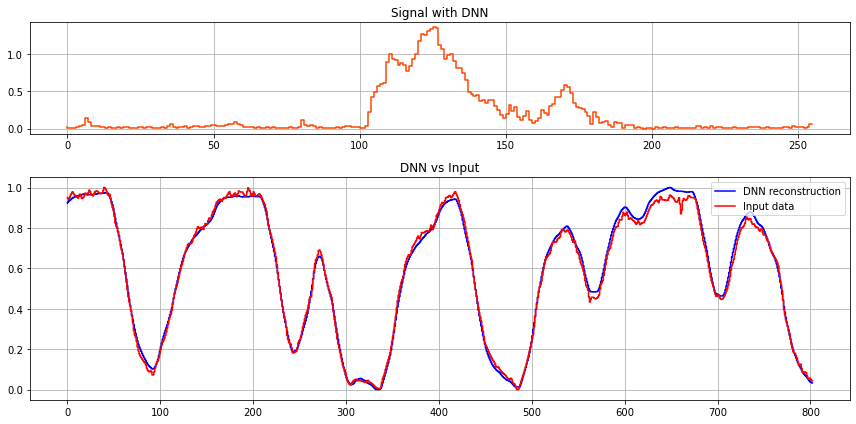

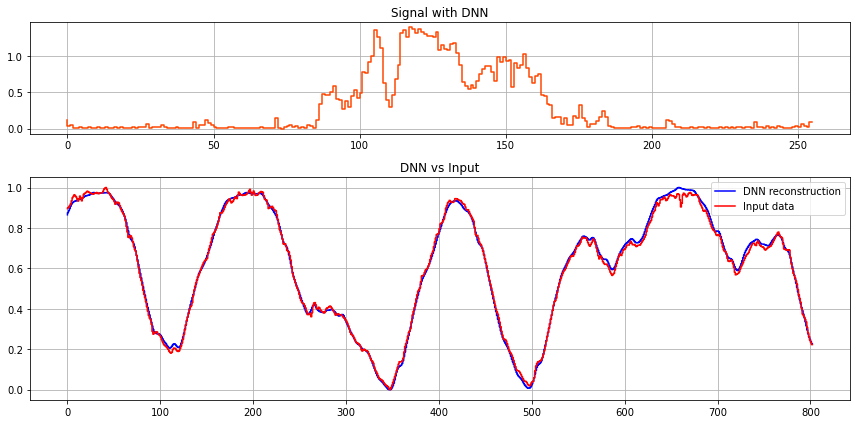

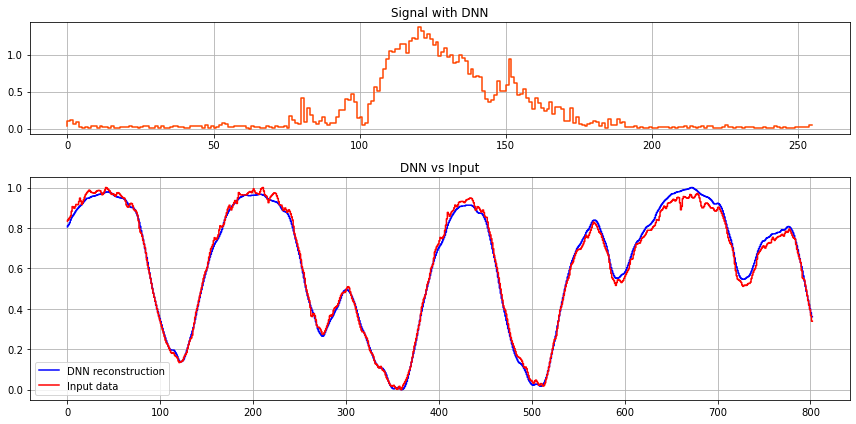

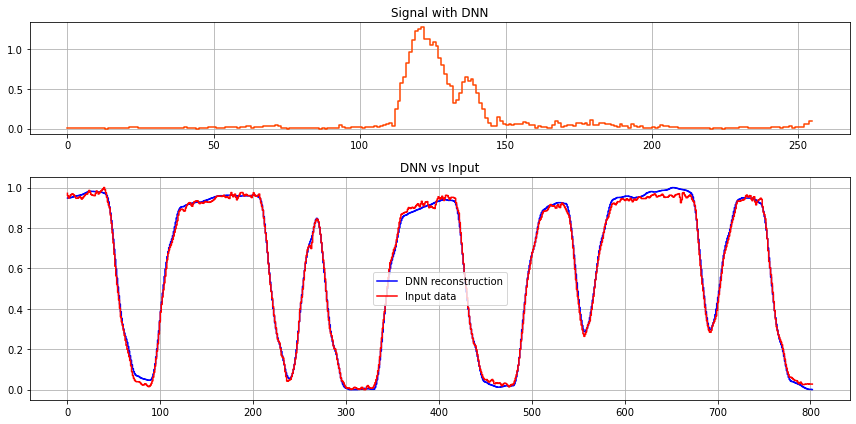

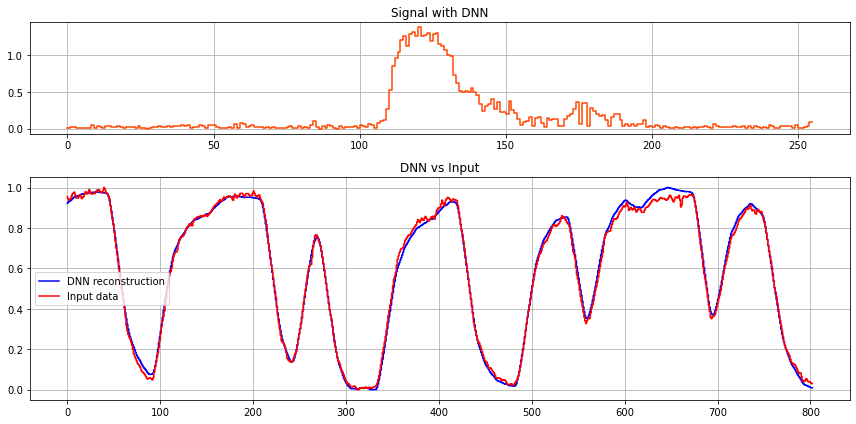

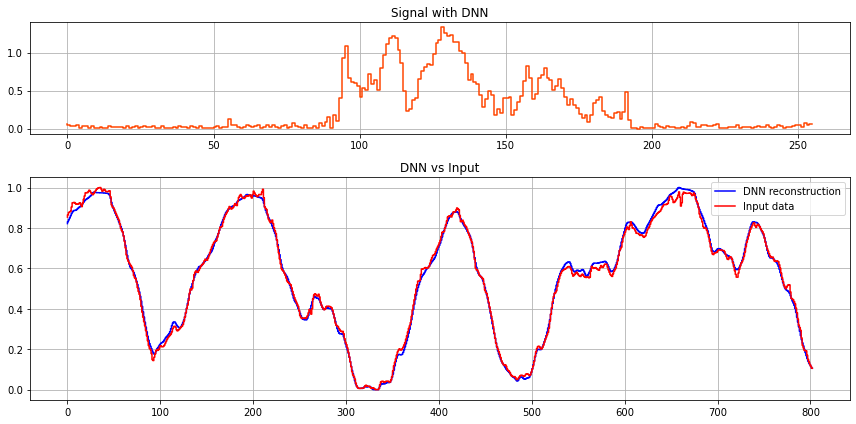

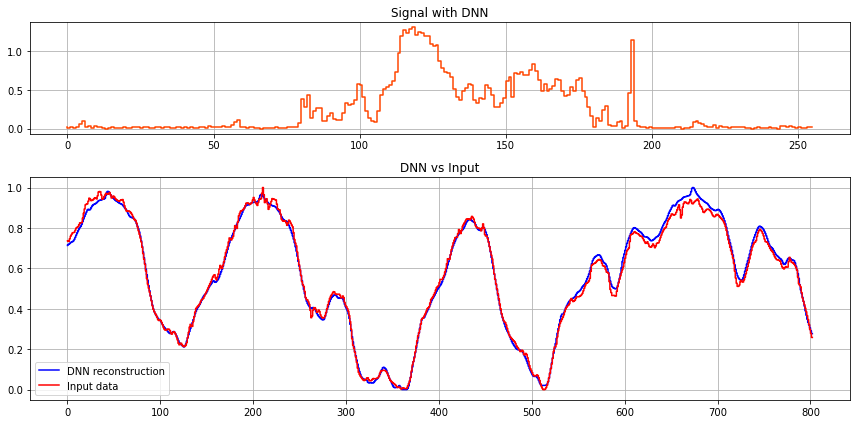

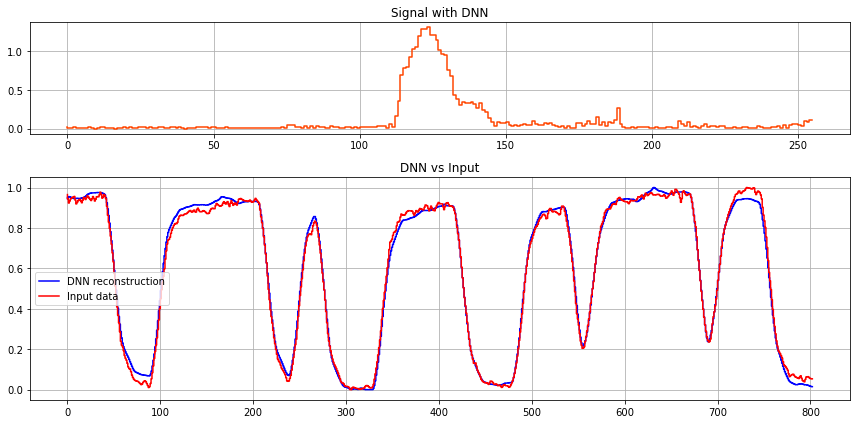

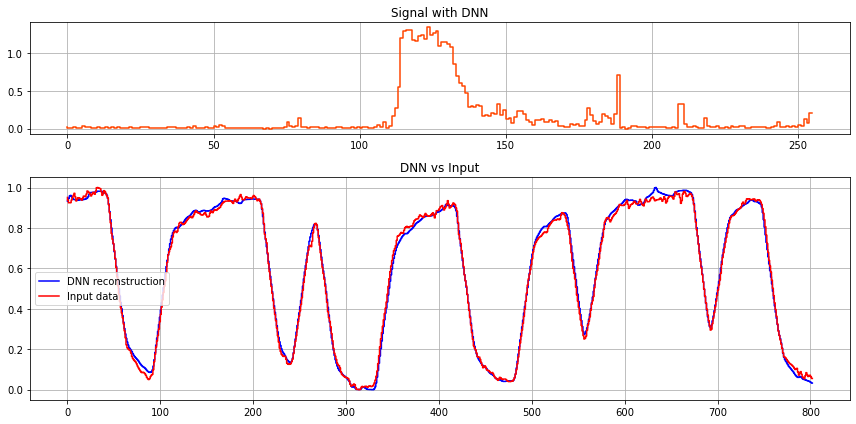

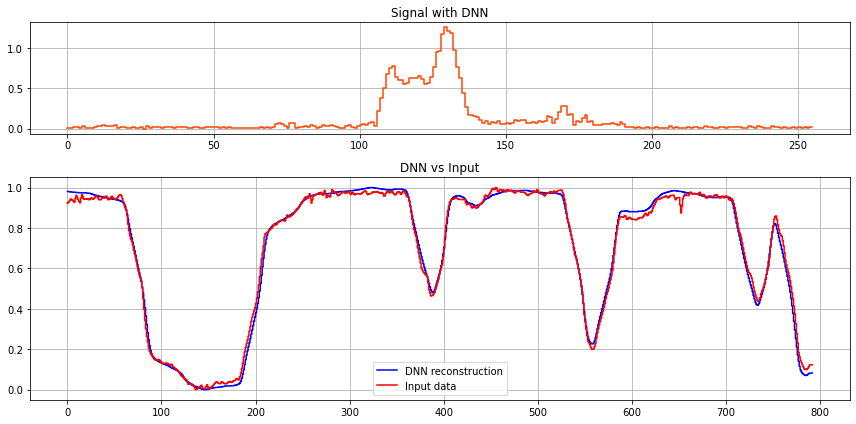

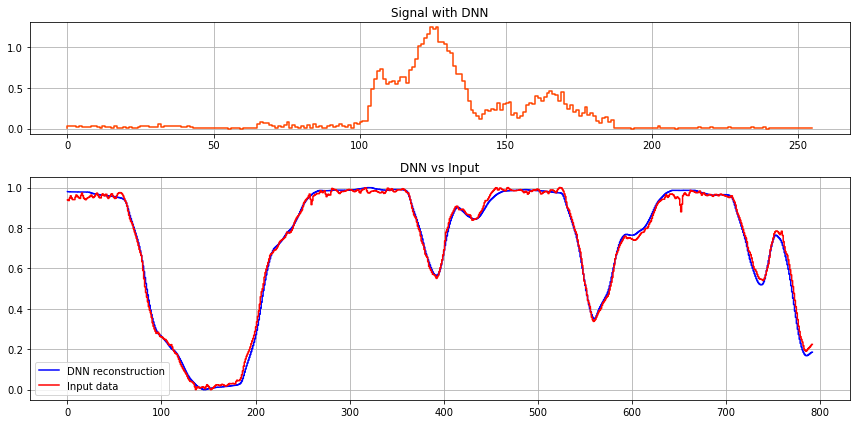

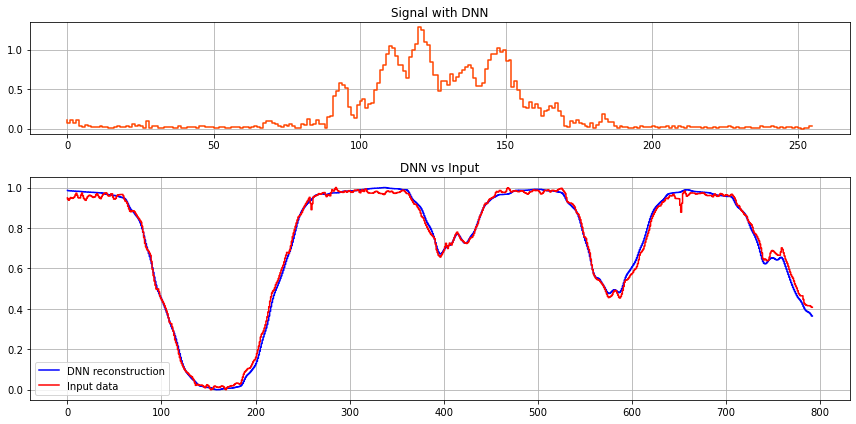

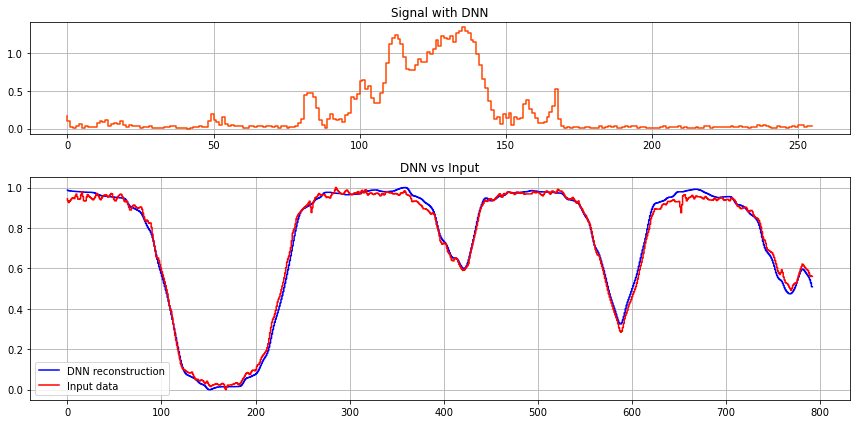

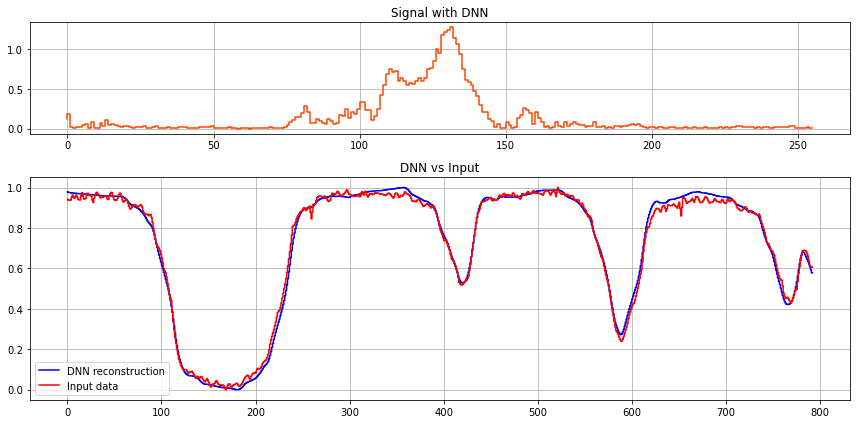

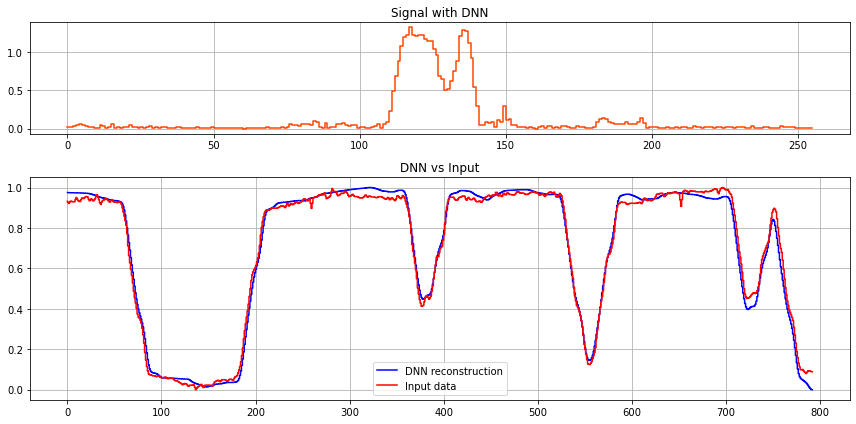

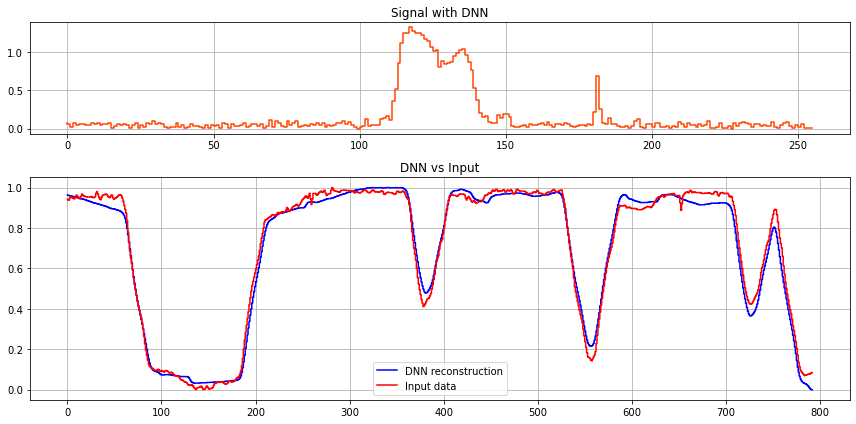

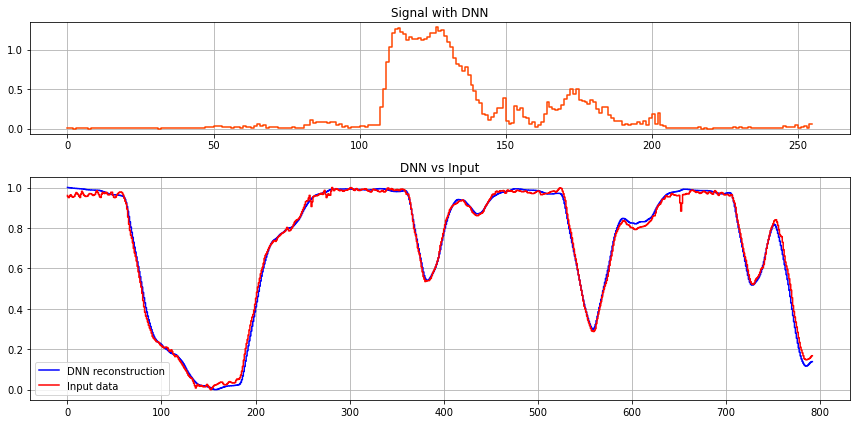

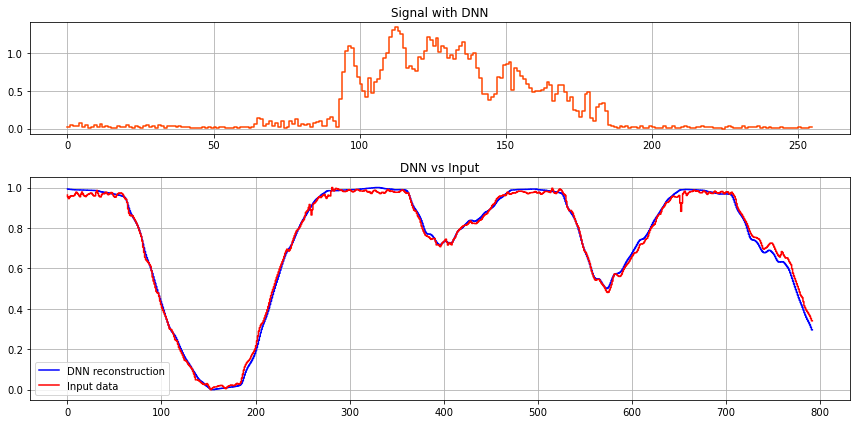

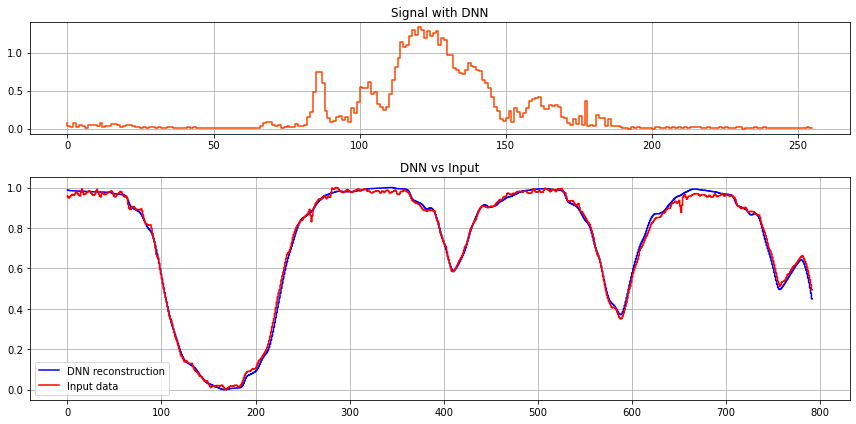

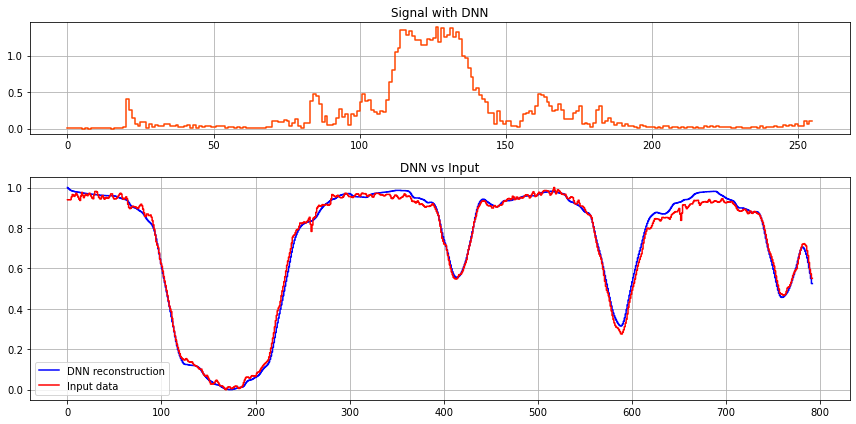

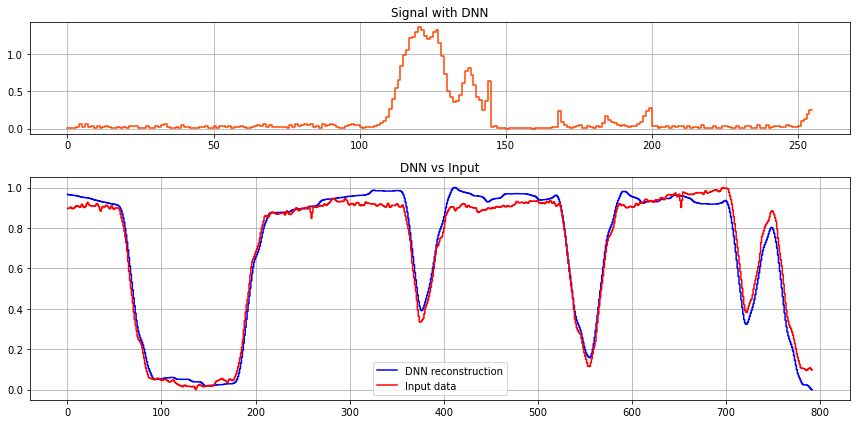

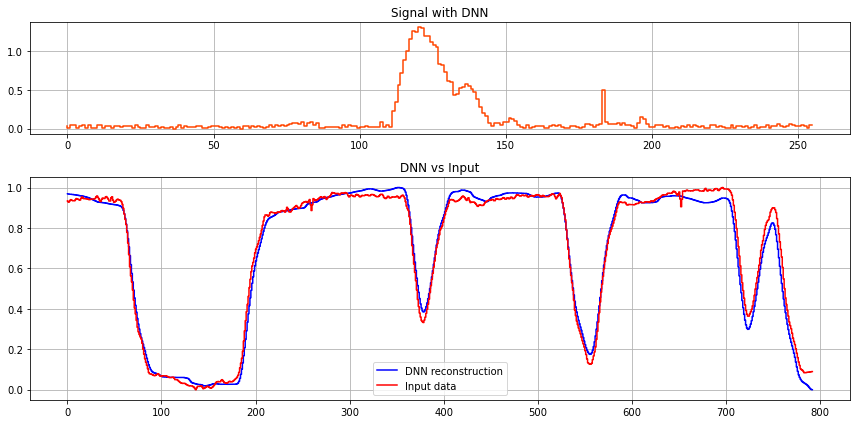

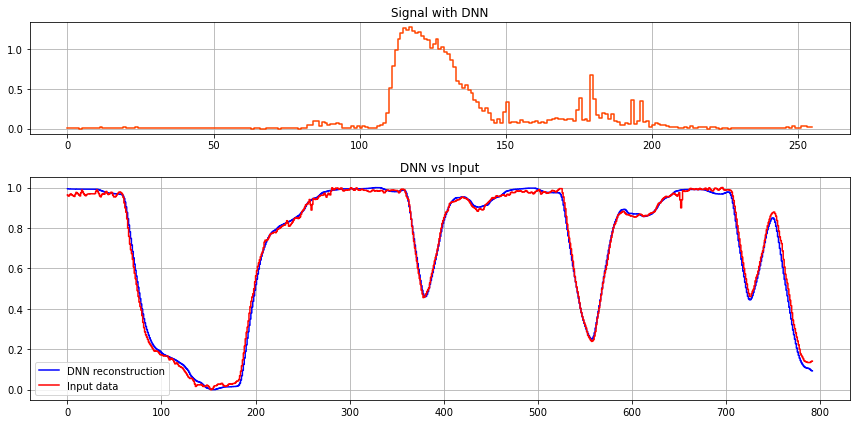

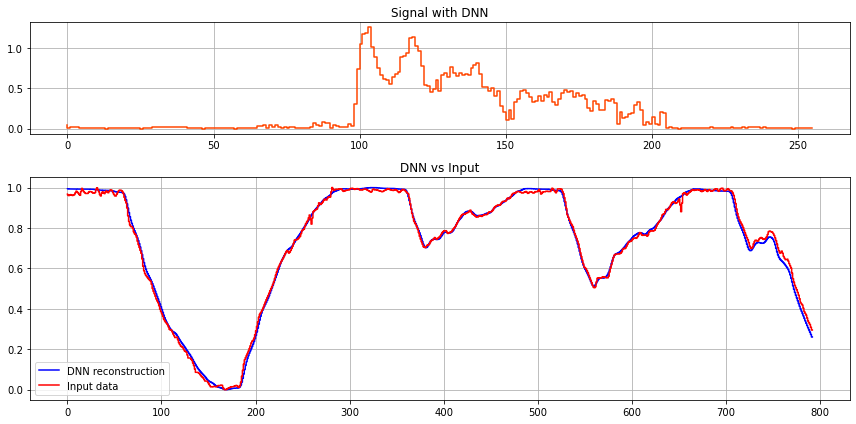

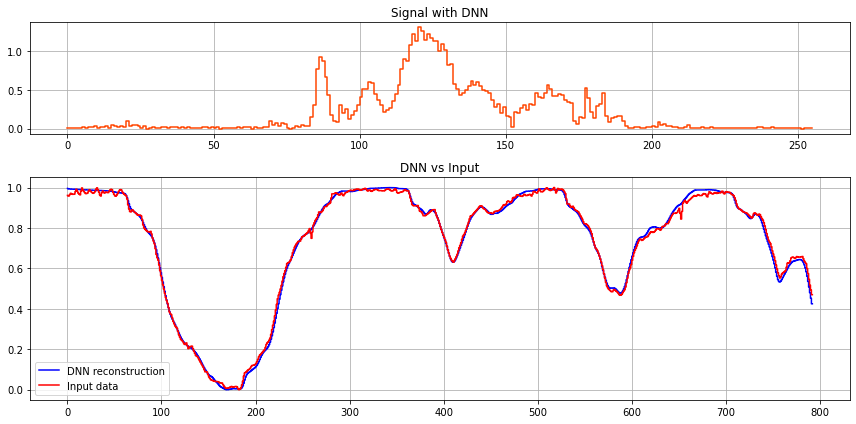

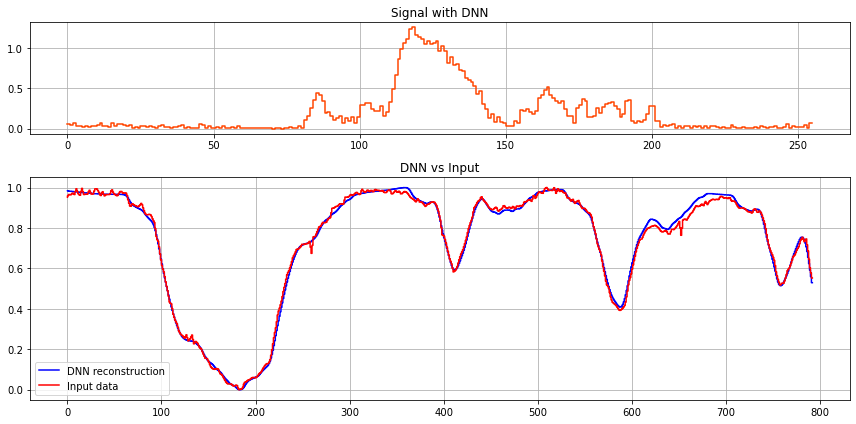

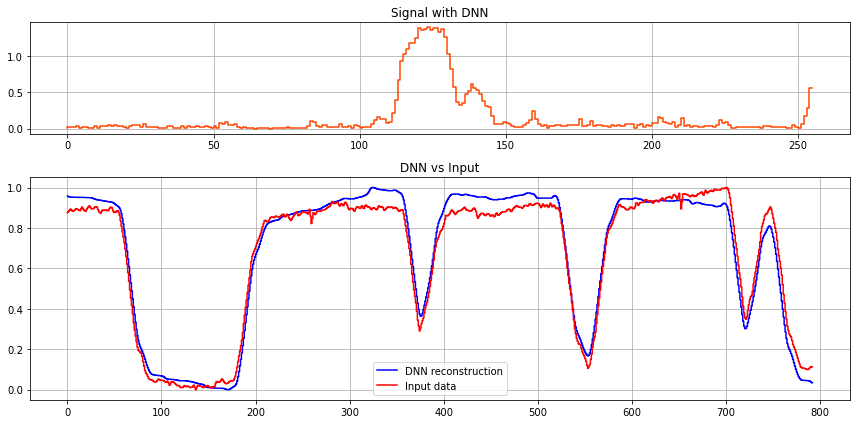

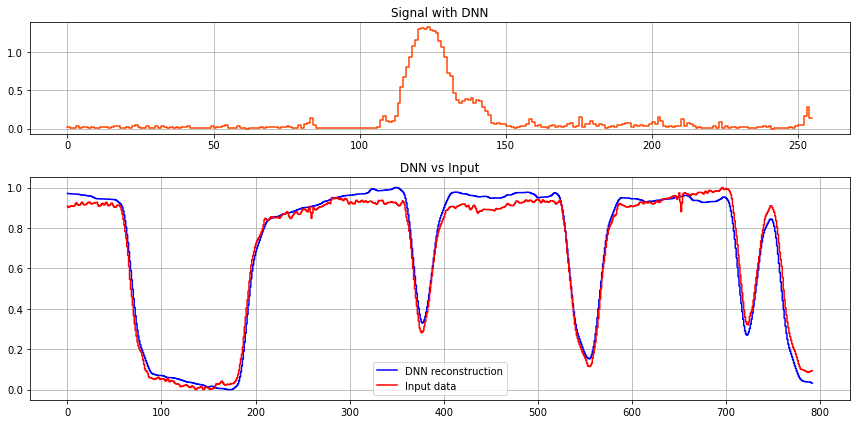

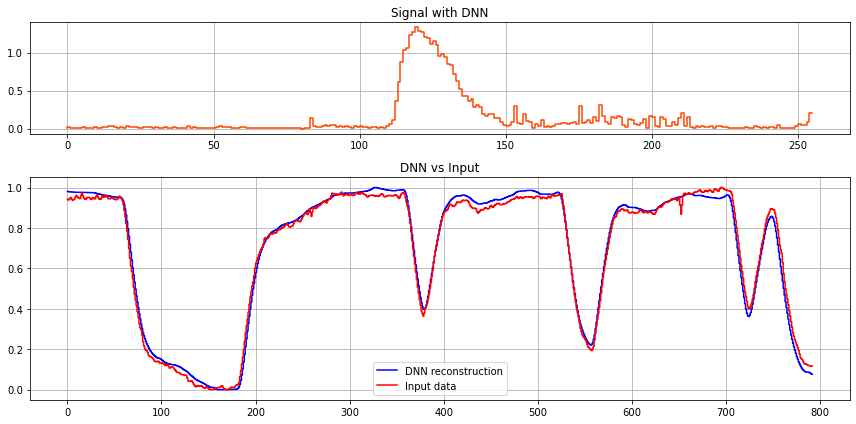

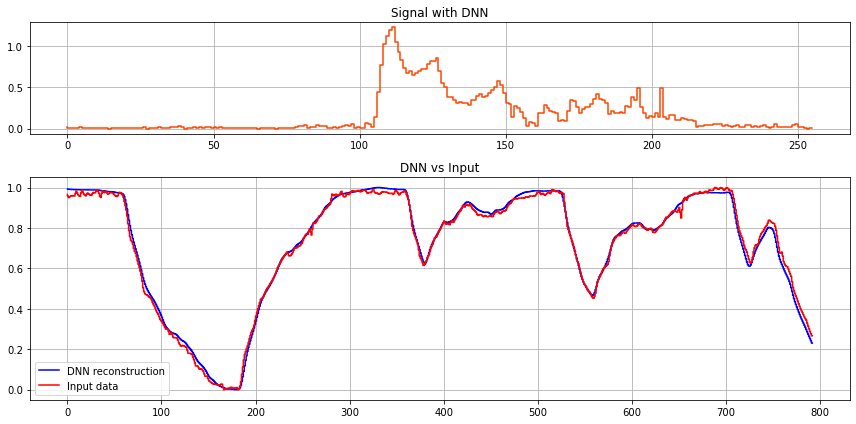

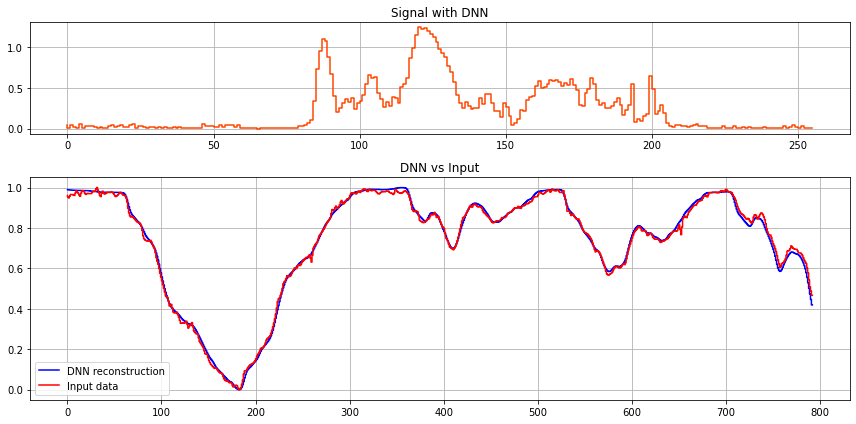

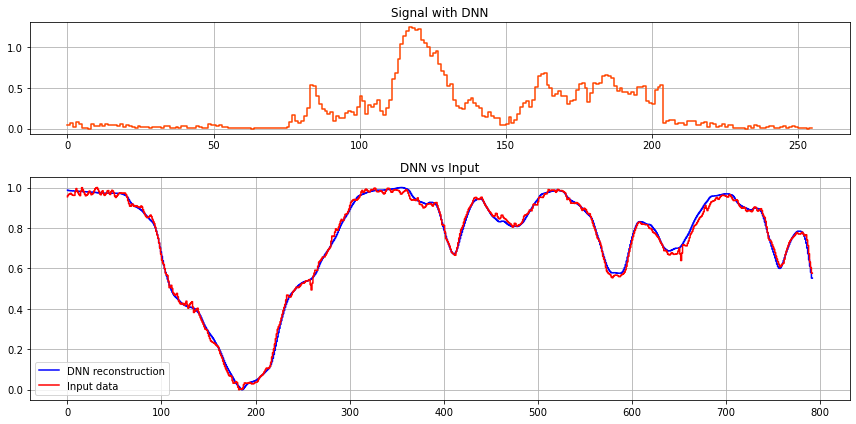

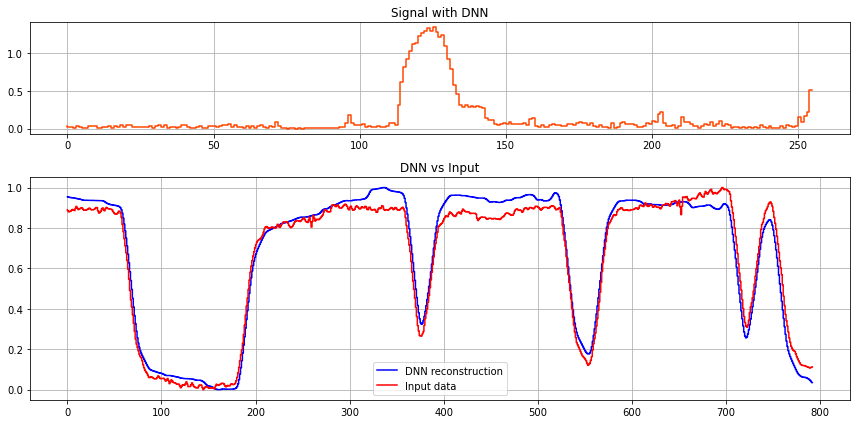

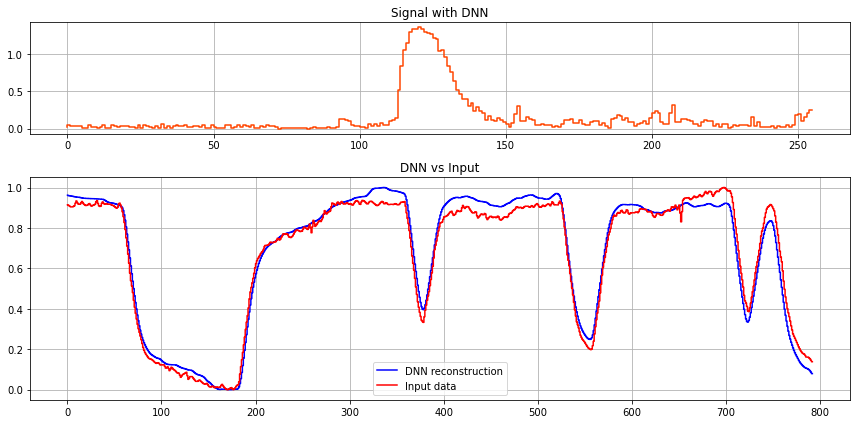

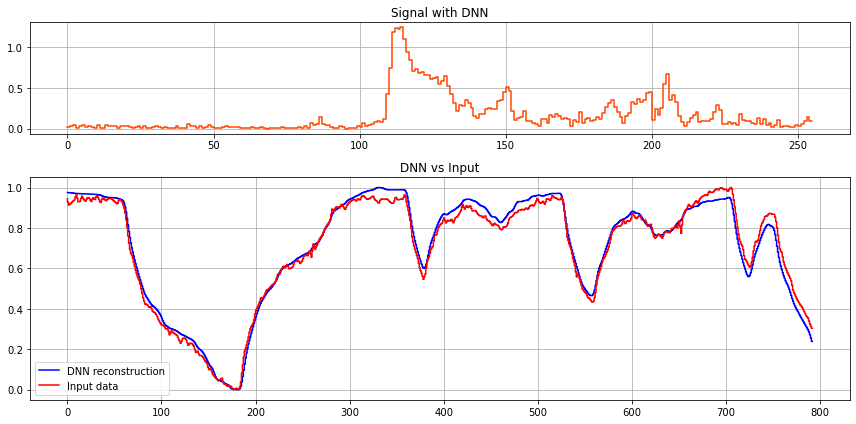

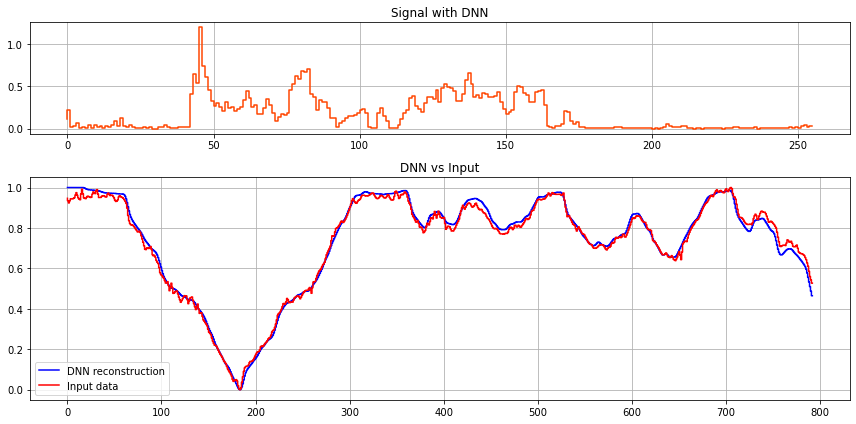

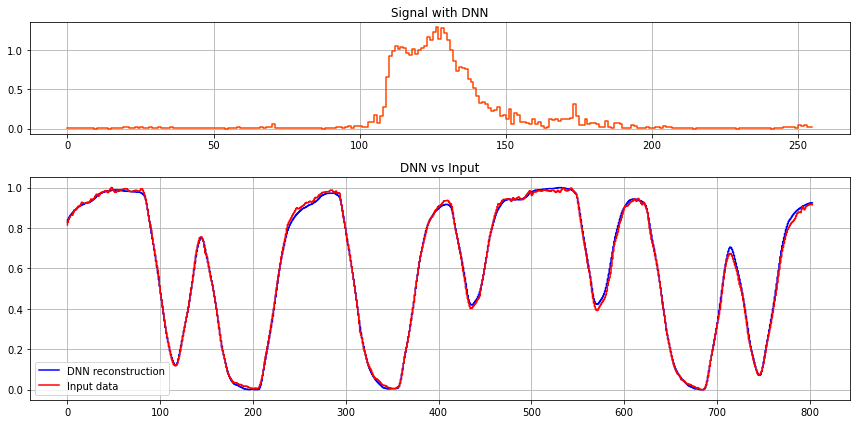

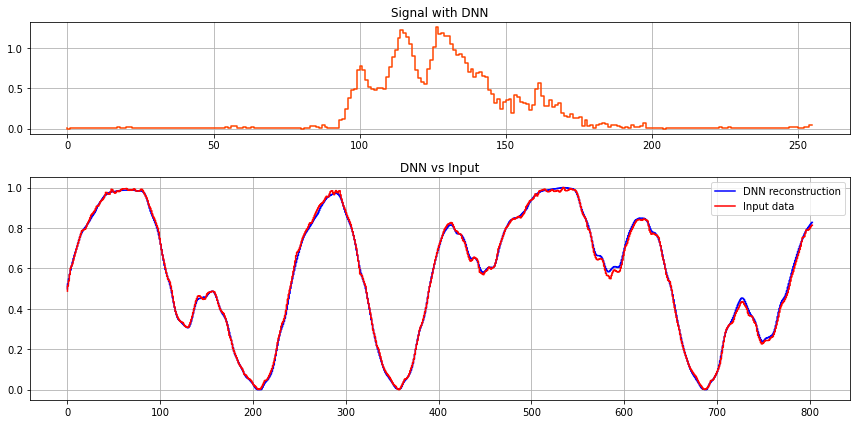

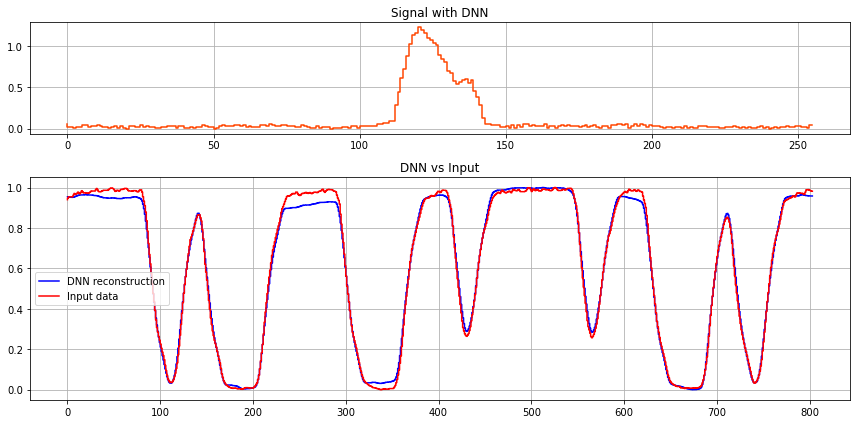

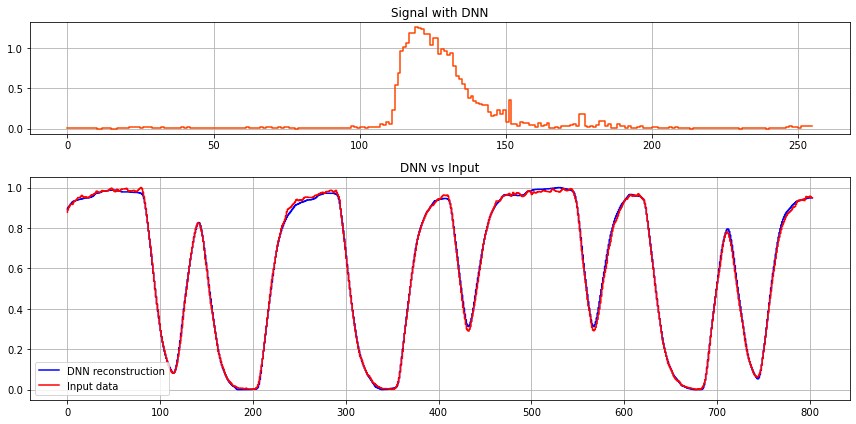

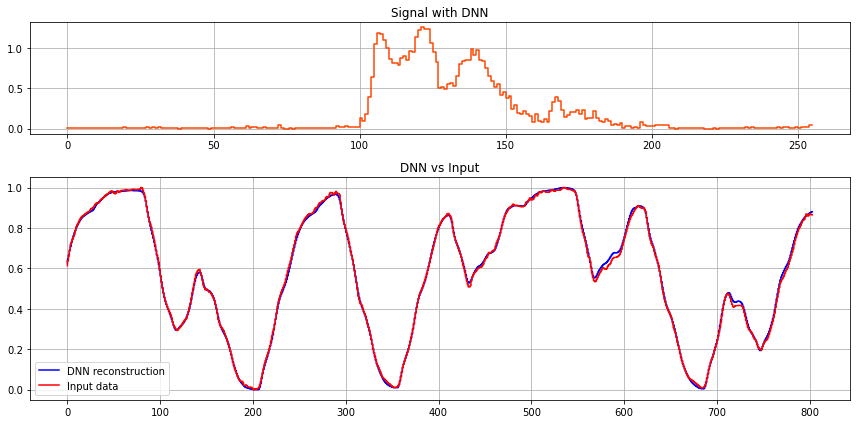

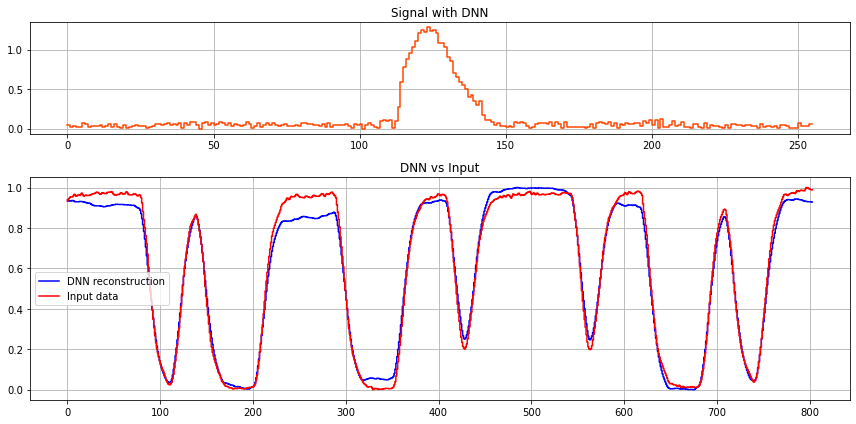

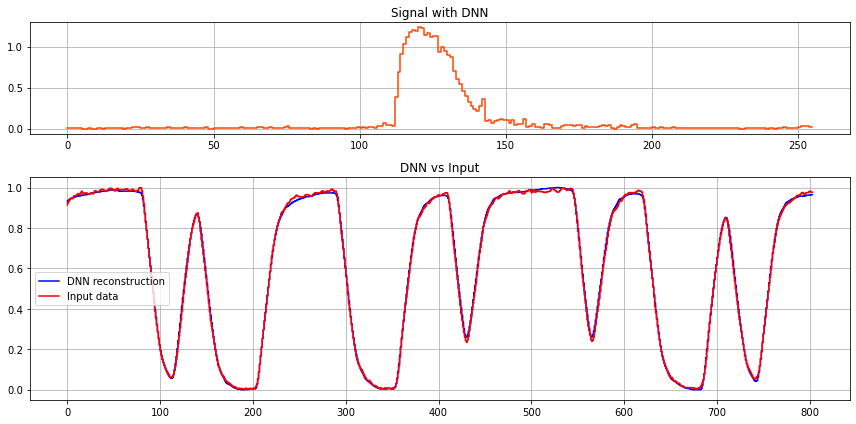

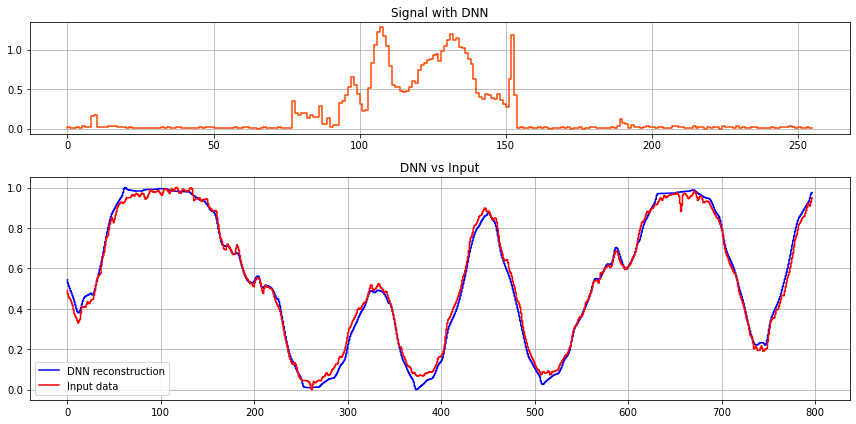

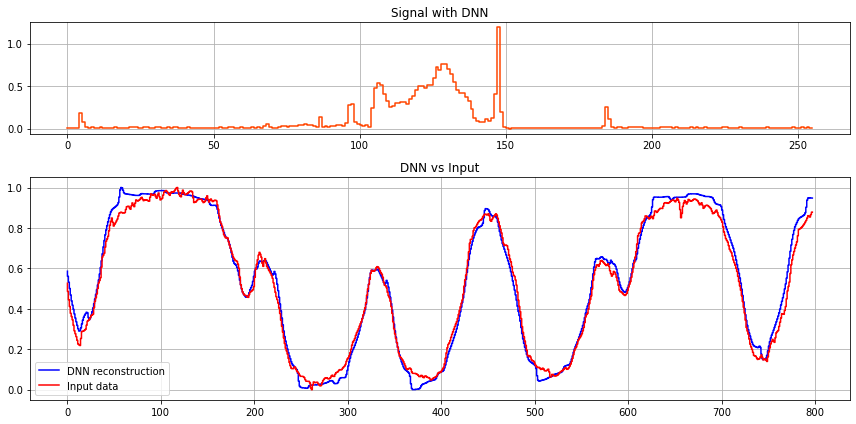

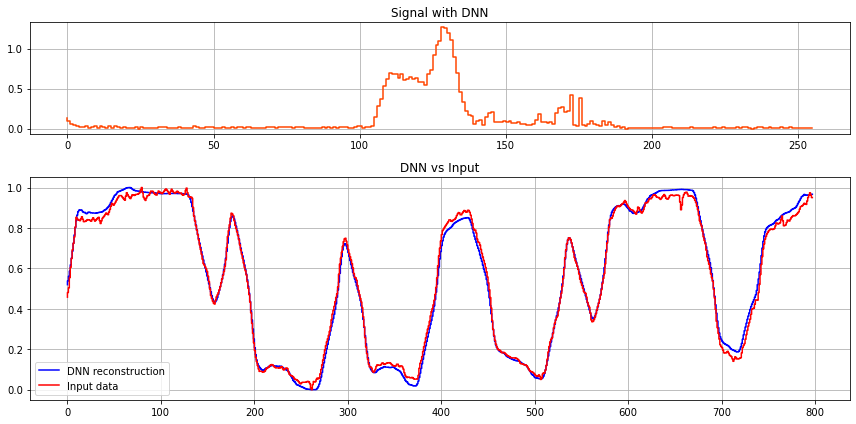

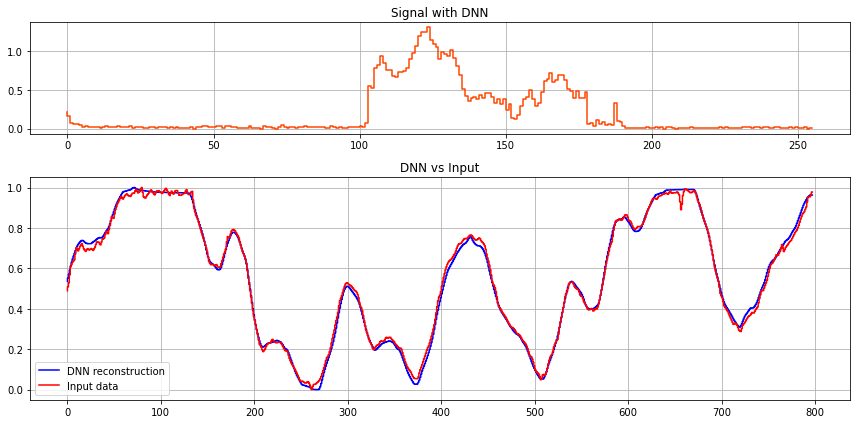

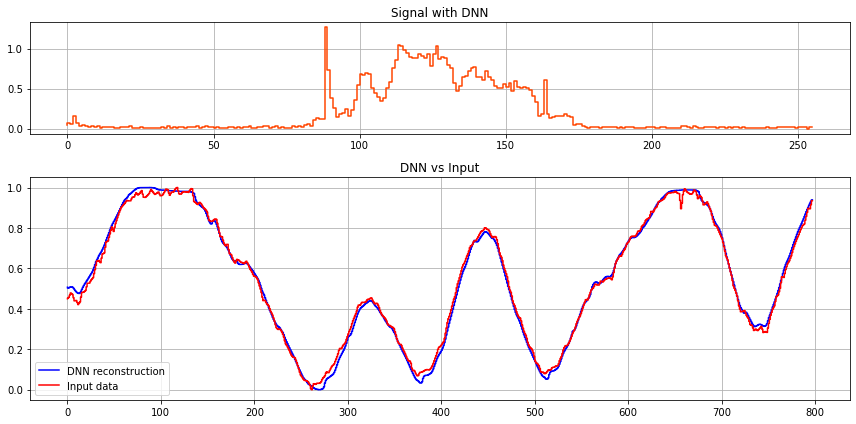

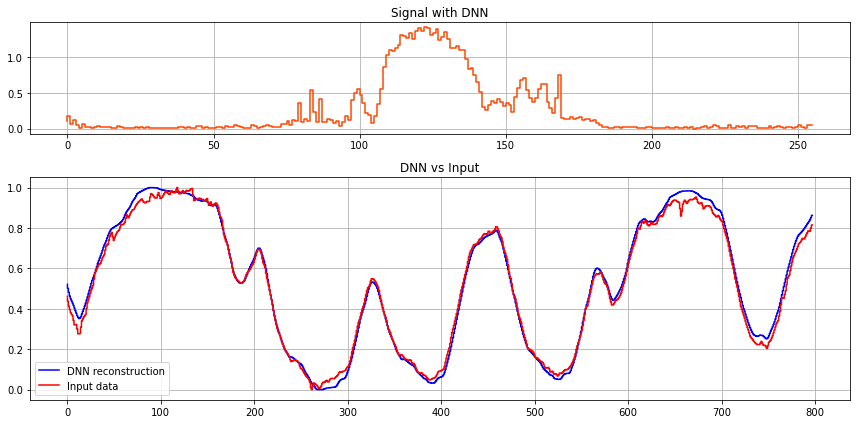

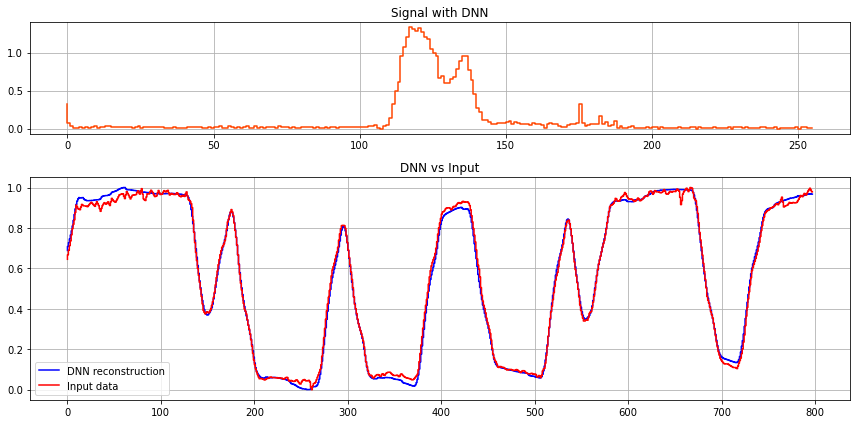

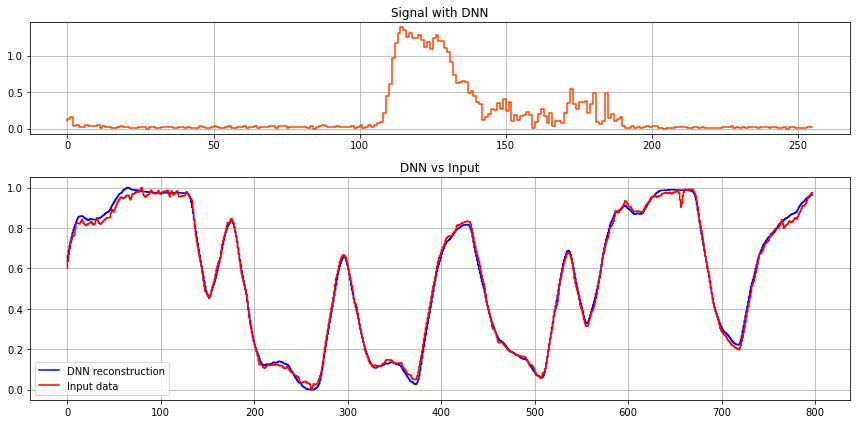

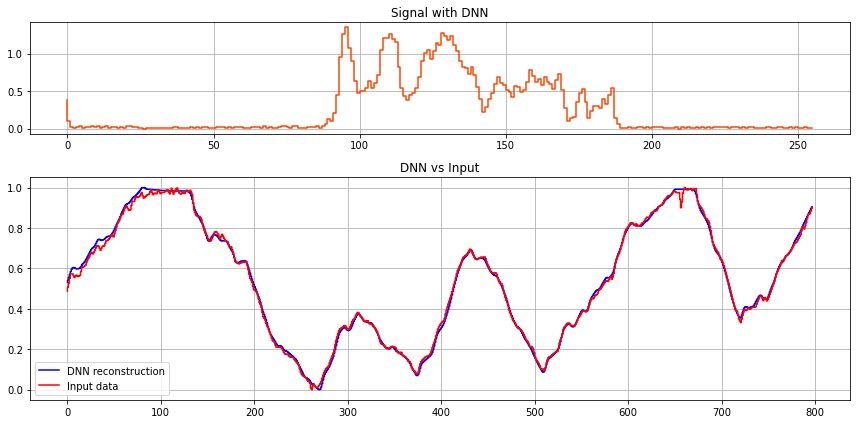

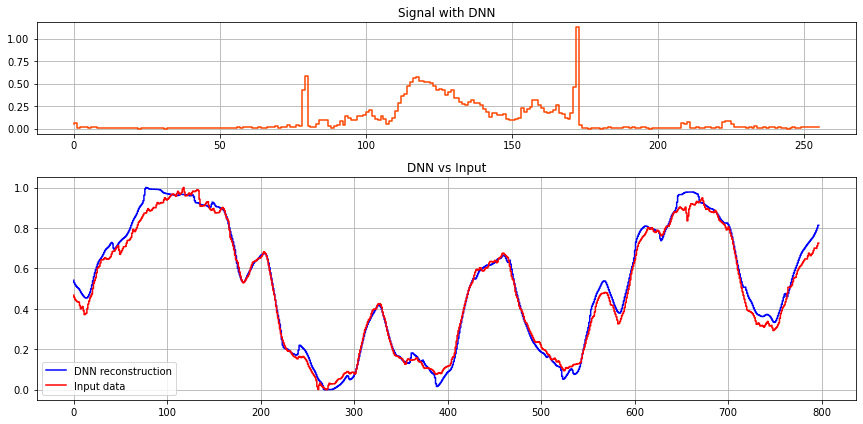

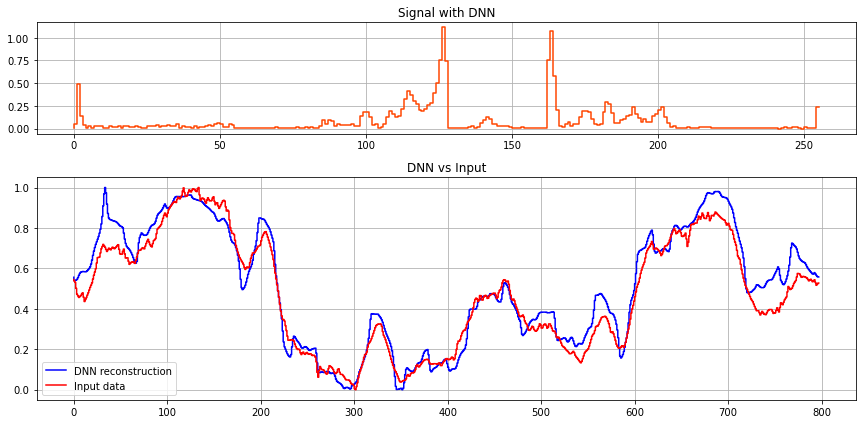

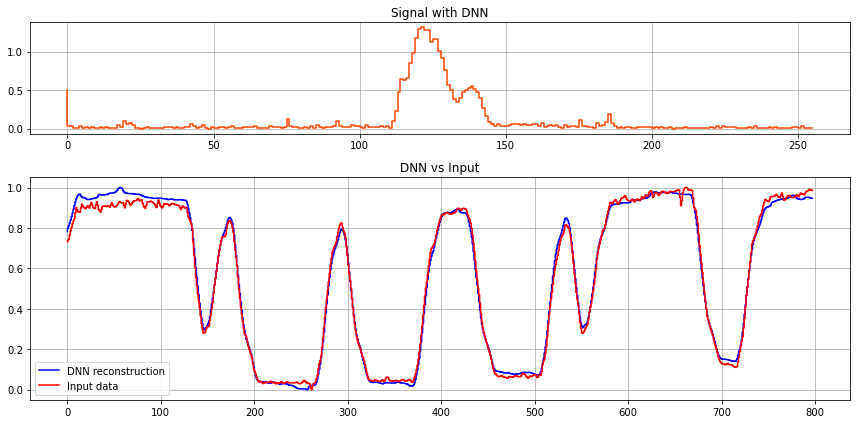

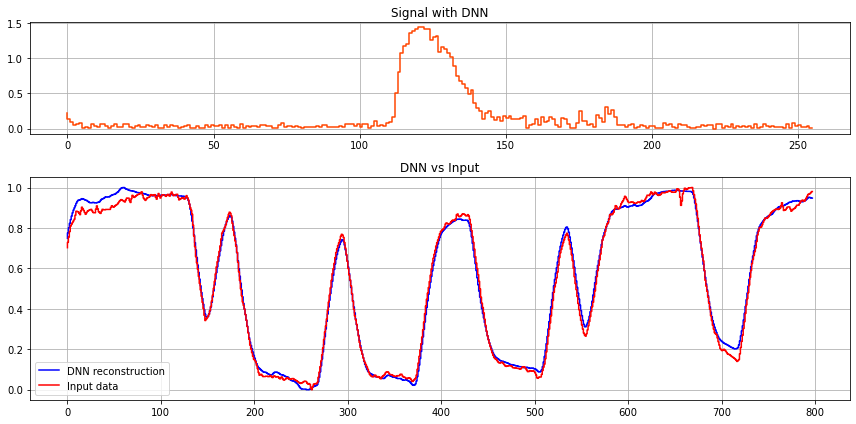

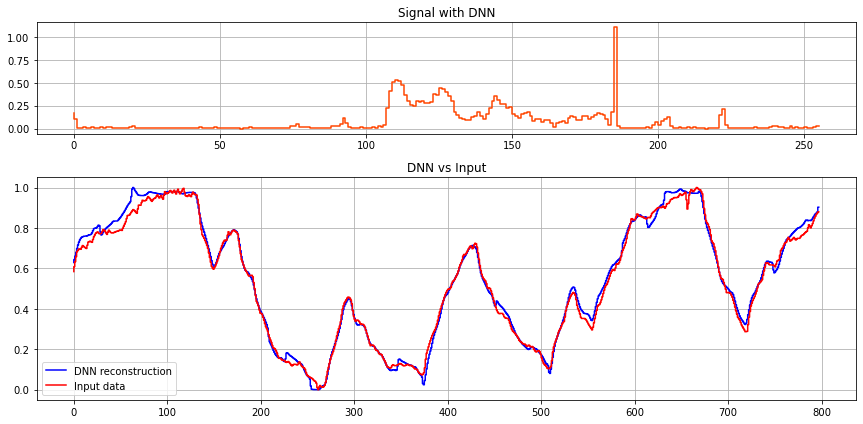

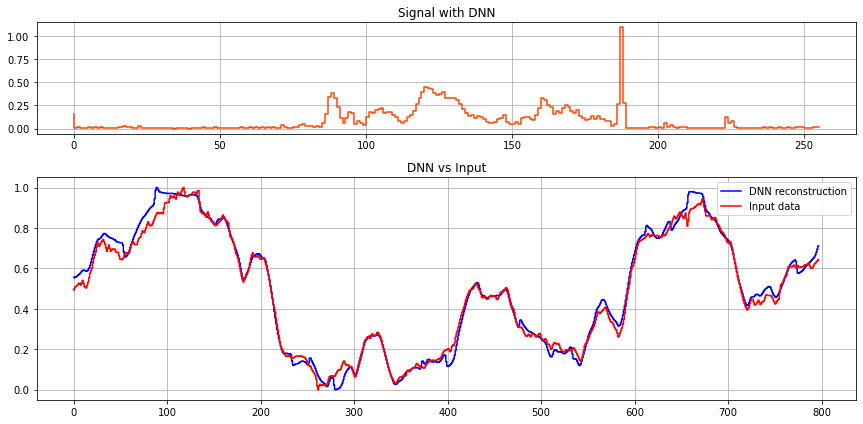

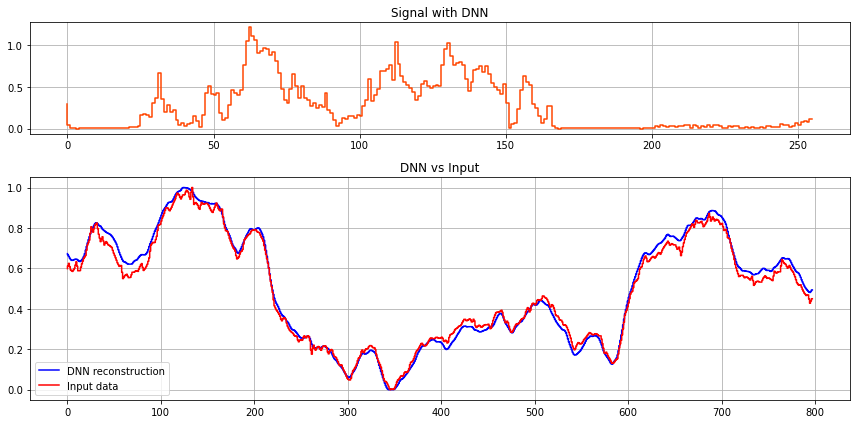

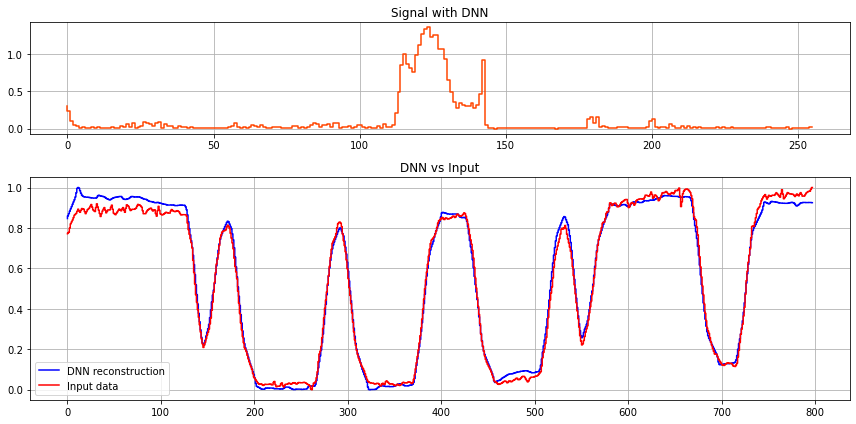

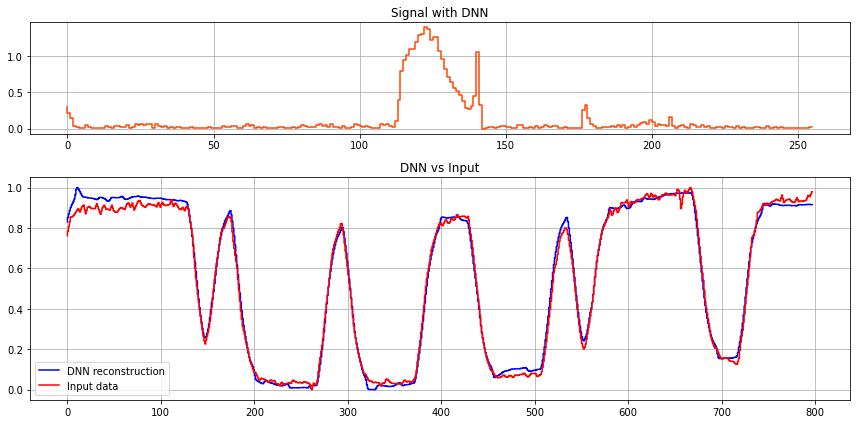

In [3]:
for i in range(153):
    data = np.load(f'data/data-{i}.npy')
    kernel = np.load(f'kernel/kernel-{i}.npy')
    dnn_loss = []
    sig_dnn_all = []
    diff_dnn = []
    data = np.reshape(data, (1, len(data)))
    data = nor_data(data)
    model = ca_fit(data, kernel, num_epochs = 2001)
    sig_dnn = signal_compute(model, data)
    sig_dnn_all.append(sig_dnn)
    test_dnn = nor_data(np.dot(kernel, sig_dnn))
    diff_dnn.append(np.mean(np.absolute(test_dnn-data)))
    
    sig_nnls_all = []
    diff_nnls = []
    sig_nnls = optimize.nnls(kernel, data.reshape((data.shape[1])))[0]
    sig_nnls_all.append(sig_nnls)
    test_nnls = nor_data(np.dot(kernel, sig_nnls))
    diff_nnls.append(np.mean(np.absolute(test_nnls-data)))
    
    
    results_plot(data, test_dnn)
    plt.savefig(f'dnn_results/result-{i}.png', dpi=300)
    print(f'Reconstruction of data {i} has been done.')


    
    
    